<h1>Aprendizaje de Maquinas - ACIF104 - NRC 2068</h1>
<h2>Semana 09</h2>
<h2>Sumativa 2</h2>

<h3>Integrantes</h3>

- Alonso Cid Riveros
- Scarlett Espinoza Contreras
- Christian Mattioni Avila

In [1]:
# Celda 01
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset llamado 'adult.csv' (https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)
df_base = pd.read_csv('adult.csv')

# Imprimir la informacion del DATAFRAME
print("Informacion del Dataframe:")
print(df_base.info())

Informacion del Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [2]:
# Celda 02
df_base

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
# Celda 03
df=df_base
# --- 1. Limpieza de Espacios (CRUCIAL) ---
# Limpiar nombres de columnas
df.columns = df.columns.str.strip()
# Limpiar espacios en todas las columnas de tipo 'object' (texto)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

# Contar marcadores  '?'
print("Conteo de marcadores '?' POR COLUMNA (antes de la conversión):")
missing_counts_raw = {}

for col in df.select_dtypes(include=['object']).columns:
    # Contamos cuántas veces aparece el string '?' en esa columna
    count = (df[col] == '?').sum()
    missing_counts_raw[col] = count

# Convertir los marcadores '?' en NaN
df.replace('?', np.nan, inplace=True)

# Verificacion
print("\nVerificación con df.isnull().sum() (después de la conversión):")
missing_data_table = df.isnull().sum()
print(missing_data_table[missing_data_table > 0])


Conteo de marcadores '?' POR COLUMNA (antes de la conversión):

Verificación con df.isnull().sum() (después de la conversión):
workclass         1836
occupation        1843
native.country     583
dtype: int64


In [6]:
# Celda 04
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
# Celda 05
# Calcular el impacto de eliminar las filas
total_rows = len(df)
rows_with_missing = df.isnull().any(axis=1).sum()
percentage_loss = (rows_with_missing / total_rows) * 100

print(f"Total de filas en el dataset: {total_rows}")
print(f"Filas con al menos un valor faltante: {rows_with_missing}")
print(f"Porcentaje de datos a perder si se eliminan: {percentage_loss:.2f}%")

Total de filas en el dataset: 32561
Filas con al menos un valor faltante: 2399
Porcentaje de datos a perder si se eliminan: 7.37%


In [8]:
# Celda 06
# Verificar la redundancia entre 'education' y 'education-num'
print("--- Verificación de Redundancia Educativa ---")
# Mostramos las tuplas únicas ordenadas por el número
print(df[['education', 'education.num']].drop_duplicates().sort_values(by='education.num'))

# 2. Analizar la columna 'fnlwgt' (final weight)
print("\n--- Análisis de 'fnlwgt' (Peso de Muestreo) ---")
print(df['fnlwgt'].describe())

# --- Aplicar las eliminaciones ---
# Creamos una nueva variable df_limpio para el análisis de outliers
# Aún no imputamos, solo preparamos el df para los boxplots
df_limpio = df.drop(columns=['education', 'fnlwgt'])

print(f"\nColumnas eliminadas: 'education', 'fnlwgt'")
print(f"Columnas restantes: {df_limpio.columns.tolist()}")

--- Verificación de Redundancia Educativa ---
         education  education.num
1106     Preschool              1
26         1st-4th              2
27         5th-6th              3
3          7th-8th              4
197            9th              5
6             10th              6
16            11th              7
178           12th              8
0          HS-grad              9
2     Some-college             10
25       Assoc-voc             11
18      Assoc-acdm             12
12       Bachelors             13
13         Masters             14
11     Prof-school             15
7        Doctorate             16

--- Análisis de 'fnlwgt' (Peso de Muestreo) ---
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

Columnas eliminadas: 'education', 'fnlwgt'
Columnas restantes: ['age', 'workclass', 'education.num', 'marital.status', 'o

In [9]:
# Celda 07
# Mostramos el dataset luego de la limpieza, pasamos de 15 a 13 columnas.
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education.num   32561 non-null  int64 
 3   marital.status  32561 non-null  object
 4   occupation      30718 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital.gain    32561 non-null  int64 
 9   capital.loss    32561 non-null  int64 
 10  hours.per.week  32561 non-null  int64 
 11  native.country  31978 non-null  object
 12  income          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


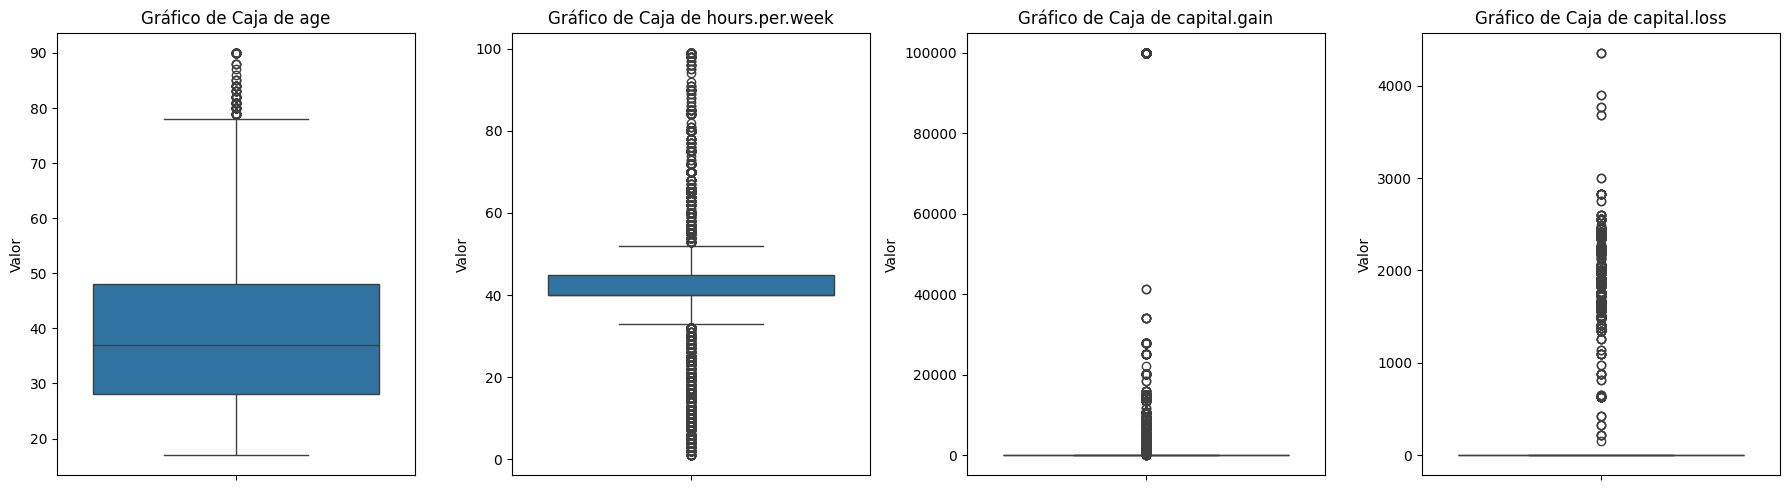

In [10]:
# Celda 08
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas numéricas que quedaron en df_limpio
# (No incluimos 'education.num' porque es ordinal/categórica)
numerical_cols = ['age', 'hours.per.week', 'capital.gain', 'capital.loss']

plt.figure(figsize=(18, 5)) # Tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 4, i + 1) # 1 fila, 4 columnas
    # Usamos el df_limpio que ya no tiene las columnas eliminadas
    sns.boxplot(y=df_limpio[col])
    plt.title(f'Gráfico de Caja de {col}')
    plt.ylabel('Valor')

plt.tight_layout() # Ajusta los gráficos para que no se superpongan
plt.show() # Muestra la figura

# **Analisis Exploratorio**

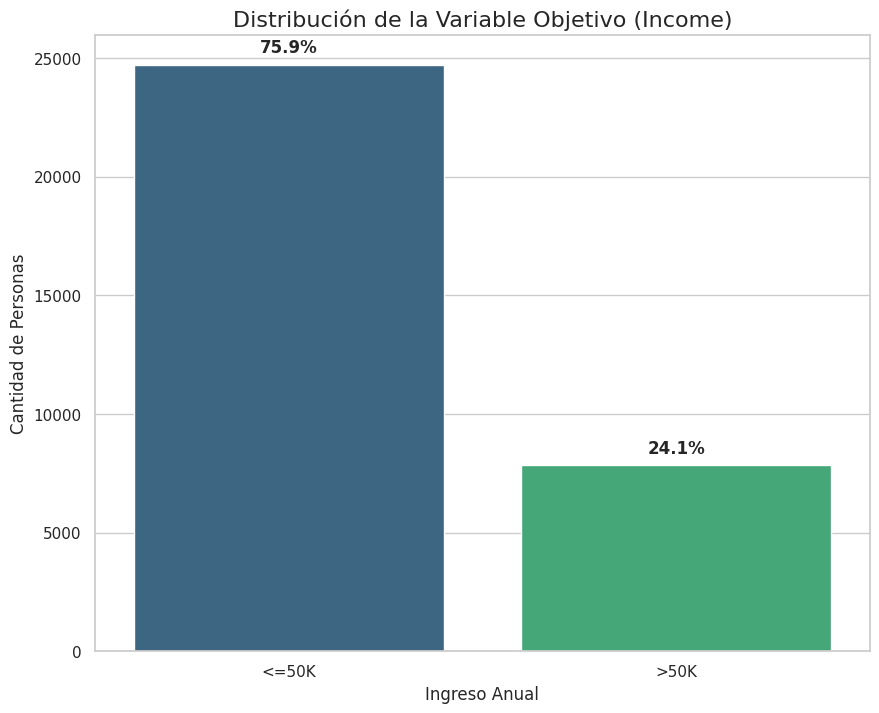

In [11]:
# Celda 09
import seaborn as sns
import matplotlib.pyplot as plt

# Continuamos con el Dataframe 'df_limpio'
# Configuración de estilo de Seaborn
sns.set_theme(style="whitegrid")

# --- 1. Gráfico de Distribución (Countplot) ---
plt.figure(figsize=(10, 8))
# Usamos el df_limpio, los nulos se manejan por defecto
ax = sns.countplot(x='income', data=df_limpio, palette='viridis', order=['<=50K', '>50K'], hue='income', legend=False)

# Añadir porcentajes al gráfico
total = len(df_limpio['income'].dropna())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 500, # Ajusta este '500' si es necesario
            f'{height/total:.1%}',
            ha="center", fontsize=12, fontweight='bold')

plt.title('Distribución de la Variable Objetivo (Income)', fontsize=16)
plt.xlabel('Ingreso Anual', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)
plt.show()

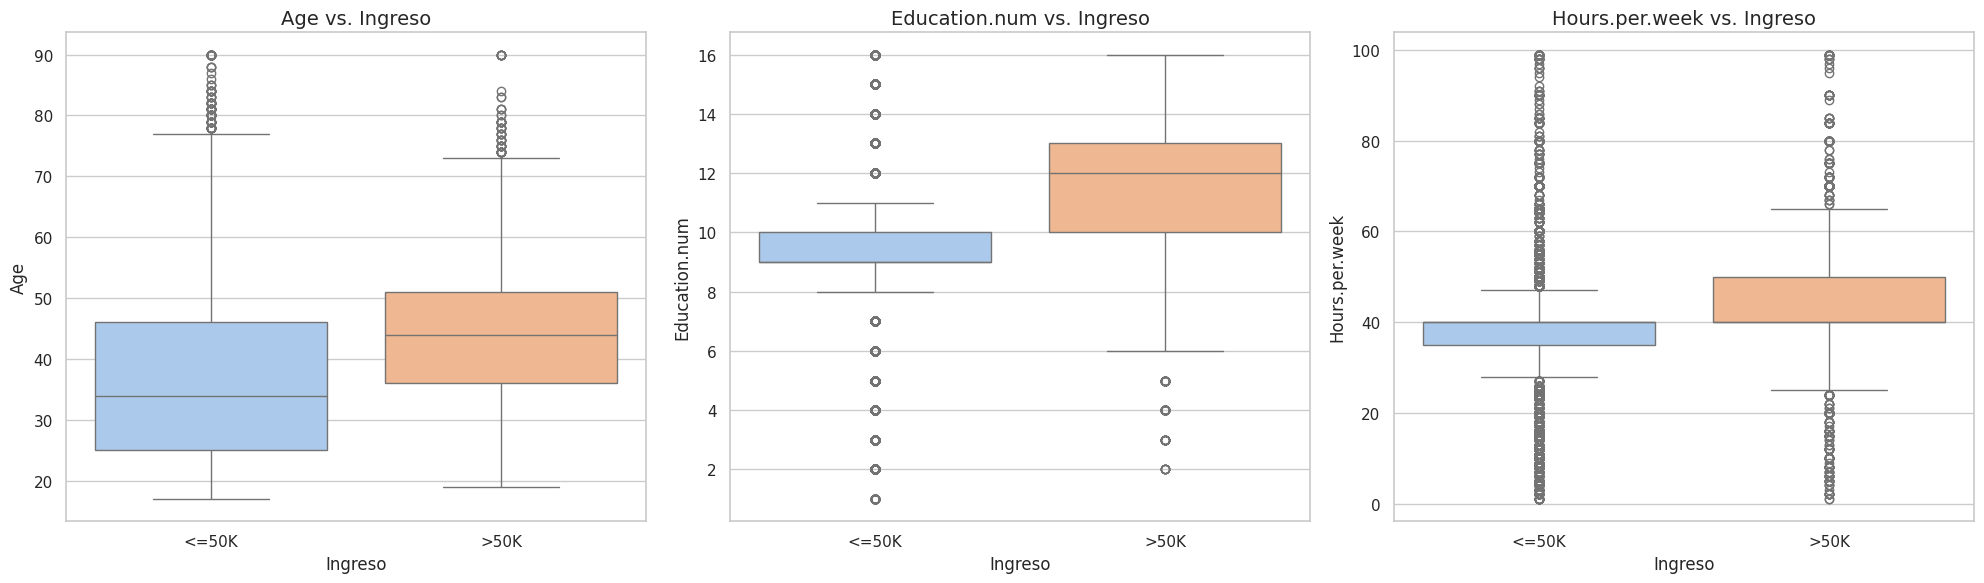

In [12]:
# Celda 10
# VARIABLES NUMÉRICAS VS. OBJETIVO (INCOME)
# Columnas numéricas clave
numerical_cols = ['age', 'education.num', 'hours.per.week']

plt.figure(figsize=(20, 6))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    # Usamos un Boxplot para ver medianas, cuartiles y outliers
    sns.boxplot(data=df_limpio, x='income', y=col, palette='pastel', order=['<=50K', '>50K'], hue='income', legend=False)
    plt.title(f'{col.capitalize()} vs. Ingreso', fontsize=14)
    plt.xlabel('Ingreso')
    plt.ylabel(col.capitalize())

plt.tight_layout()
plt.show()

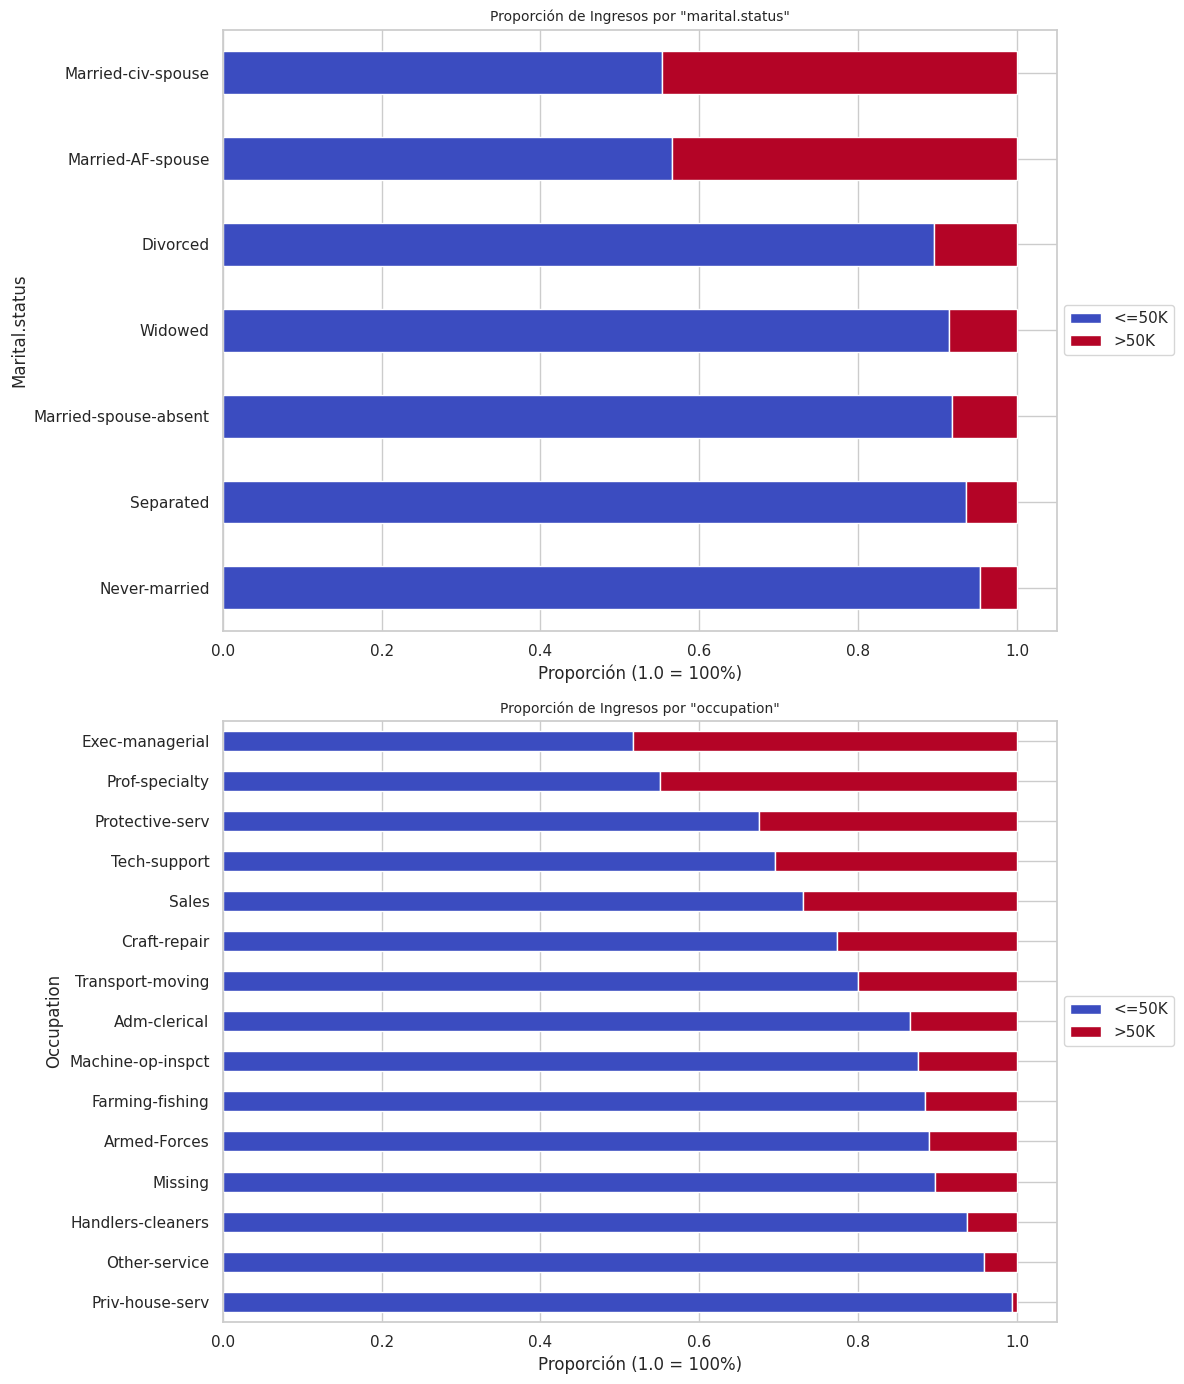

In [13]:
# Celda 11
# Variables Categóricas vs. Objetivo (income)
# Seleccionamos las categóricas más relevantes
# 'occupation' y 'marital.status' suelen ser muy predictivas
categorical_cols_plot = ['marital.status', 'occupation']

fig, axes = plt.subplots(2, 1, figsize=(12, 14)) # 2 filas, 1 columna

for i, col in enumerate(categorical_cols_plot):
    # Calculamos la proporción (normalización)
    # Rellenamos los NaN con 'Missing' para visualizarlos
    df_plot = df_limpio.fillna('Missing').groupby(col)['income'].value_counts(normalize=True).unstack().fillna(0)

    # Ordenamos por la proporción de '>50K'
    df_plot.sort_values(by='>50K', ascending=True).plot(
        kind='barh',
        stacked=True,
        cmap='coolwarm',
        ax=axes[i]
    )

    axes[i].set_title(f'Proporción de Ingresos por "{col}"', fontsize=10)
    axes[i].set_xlabel('Proporción (1.0 = 100%)')
    axes[i].set_ylabel(col.capitalize())
    axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

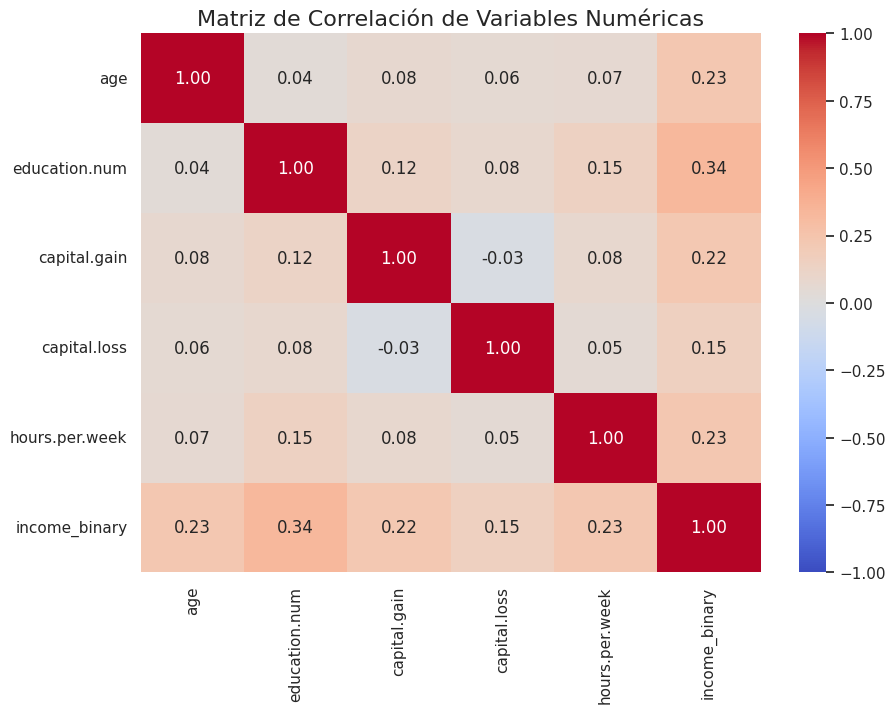

In [14]:
# Celda 12
# MATRIZ DE CORRELACION (HEAT MAP)
import numpy as np

# Para el heatmap, necesitamos binarizar 'income'
df_corr = df_limpio.copy()
df_corr['income_binary'] = df_corr['income'].map({'<=50K': 0, '>50K': 1})

# Seleccionamos solo las columnas numéricas (incluyendo la nueva binaria)
numerical_data = df_corr.select_dtypes(include=np.number)

plt.figure(figsize=(10, 7))
sns.heatmap(
    numerical_data.corr(),
    annot=True,         # Mostrar los valores numéricos
    fmt='.2f',          # Formato de 2 decimales
    cmap='coolwarm',    # Paleta de colores
    vmin=-1, vmax=1     # Rango de -1 a 1
)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.show()

<h1>5. Experimentacion de resultados

In [15]:
# Celda 13
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SklearnPipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# 2. LIMPIEZA DE ETIQUETA (Target)
# Eliminamos las filas NaN

print(f"Filas en df_limpio ANTES de eliminar NAs en 'income': {len(df_limpio)}")
# Eliminamos todas las filas donde 'income' sea NaN
df_limpio.dropna(subset=['income'], inplace=True)
print(f"Filas en df_limpio DESPUÉS de eliminar NAs en 'income': {len(df_limpio)}")

# Definición de Features (X) y Target (y) ---
X = df_limpio.drop(columns=['income'])
# Ahora que 'income' no tiene NAs, este .map() no generará NAs en 'y'
y = df_limpio['income'].map({'<=50K': 0, '>50K': 1})

# Verificación (Opcional pero recomendado)
print(f"Total de valores nulos en 'y' (debe ser 0): {y.isnull().sum()}")

# Identificar tipos de columnas ---
# Columnas numéricas
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
# Columnas categóricas
categorical_cols = X.select_dtypes(include='object').columns.tolist()

print(f"\nColumnas Numéricas: {numerical_cols}")
print(f"Columnas Categóricas: {categorical_cols}")

Filas en df_limpio ANTES de eliminar NAs en 'income': 32561
Filas en df_limpio DESPUÉS de eliminar NAs en 'income': 32561
Total de valores nulos en 'y' (debe ser 0): 0

Columnas Numéricas: ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
Columnas Categóricas: ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


In [16]:
# Celda 14
# Dividir en 80% train y 20% test
# Usamos stratify=y para mantener el desbalance de clases en ambos sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,    ## AQUI CORREGIMOS EL TEST A 0.3
    random_state=42, # Para reproducibilidad
    stratify=y
)

print(f"Tamaño Train: {X_train.shape}")
print(f"Tamaño Test: {X_test.shape}")
print(f"Proporción >50K en Train: {y_train.mean():.2f}")
print(f"Proporción >50K en Test: {y_test.mean():.2f}")

Tamaño Train: (22792, 12)
Tamaño Test: (9769, 12)
Proporción >50K en Train: 0.24
Proporción >50K en Test: 0.24


# <h2>PIPELINE DE PREPROCESAMIENTO

In [17]:
# Celda 15
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SklearnPipeline

# 1. Pipeline Numérico ---
# (Solo escalado)
numeric_transformer = SklearnPipeline(steps=[
    ('scaler', StandardScaler())
])

# 2. Pipeline Categórico ---
categorical_transformer = SklearnPipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Imputar '?'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))   # Codificar
])

# 3. Combinar en un Preprocesador ---
# (Usamos las variables 'numerical_cols' y 'categorical_cols'
# que definimos en el bloque de código anterior)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

print("Pipeline de preprocesamiento creado exitosamente.")

Pipeline de preprocesamiento creado exitosamente.


- GENERANDO BOXPLOTS (DESPUÉS DE STANDARDSCALER) ---


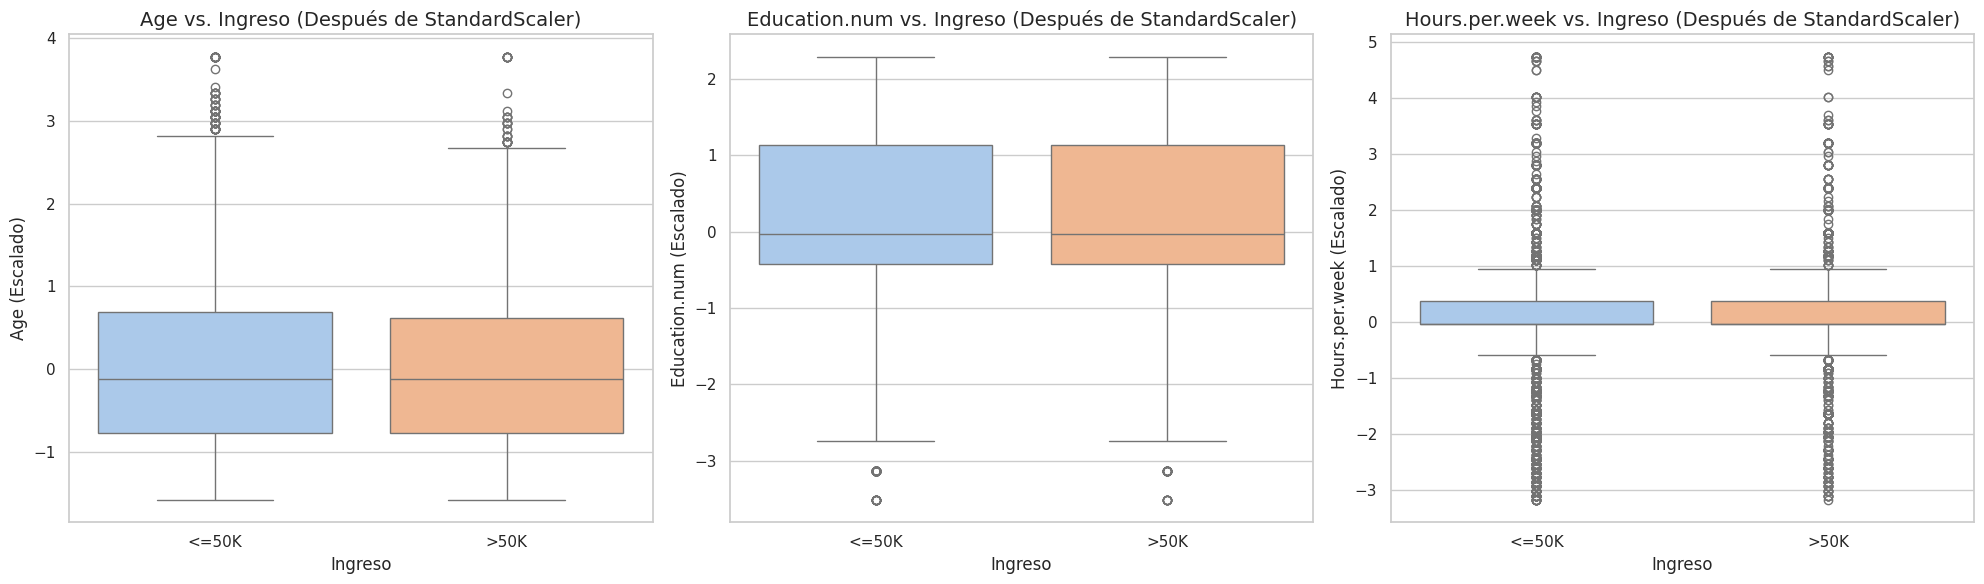

In [18]:
# Celda 16 -- NUEVA CELDA CON LOS BOXPLOT SOLICITADOS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Propósito: Visualizar el efecto del StandardScaler (como solicitó en la retroalimentación de F3) ---
# Vamos a escalar manualmente los datos de X_train SOLO PARA ESTE GRÁFICO.

# 1. Copiamos los datos de entrenamiento para no modificarlos
X_train_scaled_plot = X_train.copy()
y_train_plot = y_train.copy()

# 2. Instanciamos y aplicamos el scaler
scaler = StandardScaler()
X_train_scaled_plot[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# 3. Agregamos 'income' para poder hacer la comparativa en el gráfico
# Usamos .reset_index(drop=True) para evitar problemas al unir
X_train_scaled_plot['income'] = y_train_plot.reset_index(drop=True)
X_train_scaled_plot['income_mapped'] = X_train_scaled_plot['income'].map({0: '<=50K', 1: '>50K'})


# 4. Generamos los mismos boxplots que en la Celda 10, pero con los datos escalados
print("- GENERANDO BOXPLOTS (DESPUÉS DE STANDARDSCALER) ---")
plt.figure(figsize=(20, 6))
plot_cols = ['age', 'education.num', 'hours.per.week'] # Mismas columnas que el gráfico "antes"

for i, col in enumerate(plot_cols):
    plt.subplot(1, 3, i + 1)
    # Graficamos los datos escalados (X_train_scaled_plot)
    sns.boxplot(data=X_train_scaled_plot, x='income_mapped', y=col, palette='pastel', order=['<=50K', '>50K'], hue='income_mapped', legend=False)
    plt.title(f'{col.capitalize()} vs. Ingreso (Después de StandardScaler)', fontsize=14)
    plt.xlabel('Ingreso')
    plt.ylabel(f'{col.capitalize()} (Escalado)')

plt.tight_layout()
plt.show()

In [19]:
# Celda 17 -- NUEVA CELDA CON EL RESULTADO DEL PROCESAMIENTO COMPLETO.
# El objetivo es demostrar que preprocessor ha transforado 12 caracteristicas en muchas mas al expandir.

# 1. Ajustamos el preprocesador COMPLETO a los datos de entrenamiento
preprocessor.fit(X_train, y_train)

# 2. Transformamos los datos de entrenamiento
X_train_processed = preprocessor.transform(X_train)

# 3. Obtenemos los nombres de las nuevas características (después de One-Hot Encoding)
feature_names_out = preprocessor.get_feature_names_out()

# 4. Imprimimos los resultados
print("--- Resultado del Pipeline de Preprocesamiento ---")
print(f"Forma de X_train (Original): {X_train.shape}")
print(f"Forma de X_train (Procesada): {X_train_processed.shape}")
print("\nEsto demuestra cómo las 12 características originales se expandieron")
print(f"debido al One-Hot Encoding de las columnas categóricas.")

# Opcional: Imprimir algunas de las nuevas características para ver cómo se ven
print(f"\nEjemplo de 10 nuevas características (de las {len(feature_names_out)} totales):")
print(feature_names_out[:5])
print(feature_names_out[-5:])


--- Resultado del Pipeline de Preprocesamiento ---
Forma de X_train (Original): (22792, 12)
Forma de X_train (Procesada): (22792, 87)

Esto demuestra cómo las 12 características originales se expandieron
debido al One-Hot Encoding de las columnas categóricas.

Ejemplo de 10 nuevas características (de las 87 totales):
['num__age' 'num__education.num' 'num__capital.gain' 'num__capital.loss'
 'num__hours.per.week']
['cat__native.country_Thailand' 'cat__native.country_Trinadad&Tobago'
 'cat__native.country_United-States' 'cat__native.country_Vietnam'
 'cat__native.country_Yugoslavia']


<h2>MODELOS BASELINE (SIN BALANCEO)</h2>

In [20]:
# Celda 18
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report
import pandas as pd
import time

# 1. Definir los modelos ---
# (Usamos hiperparámetros básicos para esta prueba)
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM (Kernel RBF)": SVC(probability=True, random_state=42) # probability=True para roc_auc
}

# 2. Entrenar y Evaluar (Baseline) ---
results_baseline = []

print("--- Entrenando Modelos Baseline (Sin Balanceo) ---")
for name, model in models.items():
    print(f"Entrenando {name}...")
    start_time = time.time()

    # Crear el pipeline completo (Preprocesador + Modelo)
    pipeline_baseline = SklearnPipeline(steps=[
        ('preprocessor', preprocessor), # El preprocessor que ya creamos
        ('model', model)
    ])

    # Entrenar
    pipeline_baseline.fit(X_train, y_train)

    # Predecir (en el Test set)
    y_pred = pipeline_baseline.predict(X_test)
    y_proba = pipeline_baseline.predict_proba(X_test)[:, 1] # Probabilidad de la clase 1 (>50K)

    # Calcular Métricas
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, y_proba)
    end_time = time.time()

    results_baseline.append({
        "Modelo": name,
        "F1-Score (>50K)": f1,
        "AUC-ROC": auc,
        "Tiempo (seg)": end_time - start_time
    })

    # Imprimir el reporte detallado
    print(f"\nResultados para {name} (Baseline):")
    print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

# --- 3. Mostrar Tabla de Resultados ---
df_results_baseline = pd.DataFrame(results_baseline)
print("\n--- Tabla Comparativa Baseline ---")
print(df_results_baseline.to_markdown(index=False, floatfmt=".4f"))

--- Entrenando Modelos Baseline (Sin Balanceo) ---
Entrenando Regresión Logística...

Resultados para Regresión Logística (Baseline):
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7417
        >50K       0.73      0.60      0.66      2352

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.85      9769

Entrenando Random Forest...

Resultados para Random Forest (Baseline):
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7417
        >50K       0.70      0.61      0.65      2352

    accuracy                           0.84      9769
   macro avg       0.79      0.76      0.78      9769
weighted avg       0.84      0.84      0.84      9769

Entrenando SVM (Kernel RBF)...

Resultados para SVM (Kernel RBF) (Baseline):
              precision    recall  f1-score   support

       <=

<H2>BALANCEO </H2>

In [21]:
# Celda 19
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, roc_auc_score, classification_report
import pandas as pd
import time


# Entrenar y Evaluar (con SMOTE) ---
results_balanced = []

print("\n--- Entrenando Modelos Balanceados (con SMOTE) ---")
for name, model in models.items():
    print(f"Entrenando {name} con SMOTE...")
    start_time = time.time()

    # Crear el pipeline de imbalanced-learn
    # La única diferencia es que usamos ImbPipeline
    # y añadimos SMOTE después del preprocesador
    pipeline_balanced = ImbPipeline(steps=[
        ('preprocessor', preprocessor),       # Paso 1: Preprocesar
        ('smote', SMOTE(random_state=42)),    # Paso 2: Aplicar SMOTE
        ('model', model)                      # Paso 3: Entrenar el modelo
    ])

    # Entrenar (el pipeline se encarga de aplicar SMOTE solo a X_train, y_train)
    pipeline_balanced.fit(X_train, y_train)

    # Predecir (en el Test set ORIGINAL, sin balancear)
    y_pred = pipeline_balanced.predict(X_test)
    y_proba = pipeline_balanced.predict_proba(X_test)[:, 1]

    # Calcular Métricas
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, y_proba)
    end_time = time.time()

    results_balanced.append({
        "Modelo": name,
        "F1-Score (>50K)": f1,
        "AUC-ROC": auc,
        "Tiempo (seg)": end_time - start_time
    })

    # Imprimir el reporte detallado
    print(f"\nResultados para {name} (con SMOTE):")
    print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

# Mostrar Tabla de Resultados ---
df_results_balanced = pd.DataFrame(results_balanced)
print("\n--- Tabla Comparativa con SMOTE ---")
print(df_results_balanced.to_markdown(index=False, floatfmt=".4f"))


--- Entrenando Modelos Balanceados (con SMOTE) ---
Entrenando Regresión Logística con SMOTE...

Resultados para Regresión Logística (con SMOTE):
              precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86      7417
        >50K       0.56      0.84      0.67      2352

    accuracy                           0.80      9769
   macro avg       0.75      0.82      0.77      9769
weighted avg       0.85      0.80      0.81      9769

Entrenando Random Forest con SMOTE...

Resultados para Random Forest (con SMOTE):
              precision    recall  f1-score   support

       <=50K       0.89      0.89      0.89      7417
        >50K       0.66      0.66      0.66      2352

    accuracy                           0.84      9769
   macro avg       0.78      0.78      0.78      9769
weighted avg       0.84      0.84      0.84      9769

Entrenando SVM (Kernel RBF) con SMOTE...

Resultados para SVM (Kernel RBF) (con SMOTE):
              precision    rec

<h2> CLASSWEIGHT

In [22]:
# Celda 20
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report
import pandas as pd
import time

# Definir los modelos con 'class_weight' ---
# Aquí está el cambio clave
models_cw = {
    "Regresión Logística (CW)": LogisticRegression(
        max_iter=1000, random_state=42, class_weight='balanced'
    ),
    "Random Forest (CW)": RandomForestClassifier(
        random_state=42, class_weight='balanced'
    ),
    "SVM (Kernel RBF) (CW)": SVC(
        probability=True, random_state=42, class_weight='balanced'
    )
}
# Entrenar y Evaluar (con class_weight) ---
results_cw = []
print("\n--- Entrenando Modelos Balanceados (con class_weight) ---")
for name, model in models_cw.items():
    print(f"Entrenando {name}...")
    start_time = time.time()

    # Usamos el SklearnPipeline estándar (igual que en el baseline)
    pipeline_cw = SklearnPipeline(steps=[
        ('preprocessor', preprocessor), # El preprocessor que ya creamos
        ('model', model)               # El modelo con class_weight
    ])

    # Entrenar
    pipeline_cw.fit(X_train, y_train)

    # Predecir (en el Test set)
    y_pred = pipeline_cw.predict(X_test)
    y_proba = pipeline_cw.predict_proba(X_test)[:, 1] # Probabilidad de la clase 1 (>50K)

    # Calcular Métricas
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, y_proba)
    end_time = time.time()

    results_cw.append({
        "Modelo": name,
        "F1-Score (>50K)": f1,
        "AUC-ROC": auc,
        "Tiempo (seg)": end_time - start_time
    })

    # Imprimir el reporte detallado
    print(f"\nResultados para {name} (con class_weight):")
    print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

# Mostrar Tabla de Resultados ---
df_results_cw = pd.DataFrame(results_cw)
print("\n--- Tabla Comparativa con class_weight ---")
print(df_results_cw.to_markdown(index=False, floatfmt=".4f"))


--- Entrenando Modelos Balanceados (con class_weight) ---
Entrenando Regresión Logística (CW)...

Resultados para Regresión Logística (CW) (con class_weight):
              precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86      7417
        >50K       0.56      0.84      0.67      2352

    accuracy                           0.80      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.85      0.80      0.81      9769

Entrenando Random Forest (CW)...

Resultados para Random Forest (CW) (con class_weight):
              precision    recall  f1-score   support

       <=50K       0.89      0.91      0.90      7417
        >50K       0.69      0.63      0.66      2352

    accuracy                           0.84      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.84      0.84      9769

Entrenando SVM (Kernel RBF) (CW)...

Resultados para SVM (Kernel RBF) (CW) (con class_weight):
  

<h1>De aqui en adelante abordaremos los alcances de la Formativa 4.




<h3>Paso 1: Configurar el Entorno (Importaciones de Keras)
<h3>Primero, necesitamos importar Keras y TensorFlow.

In [23]:
# ===================================================================
# INICIO IMPLEMENTACIÓN FORMATIVA 4
# ===================================================================

# -------------------------------------------------
# PASO 1: Importaciones para Deep Learning (Keras)
# -------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import numpy as np

# Para asegurar reproducibilidad en los entrenamientos
tf.random.set_seed(42)


<h2>Paso 2: Preparar los Datos para Keras
A diferencia de los Pipelines de Scikit-Learn, con Keras debemos aplicar el preprocesamiento explícitamente antes de entrenar.

Usaremos el objeto preprocessor (de la celda [12]) para transformar los datos de 70/30.

Al aplicar OneHotEncoder, la salida será una matriz dispersa (sparse matrix). Keras prefiere matrices densas (dense arrays), así que las convertiremos con .toarray().

Determinaremos la dimensión de entrada (input_dim) para la primera capa de nuestra red.

In [24]:
# -------------------------------------------------
# PASO 2: Aplicar el Preprocesamiento
# -------------------------------------------------

print("Aplicando preprocesador a X_train...")
# 1. Aplicamos fit_transform a X_train
X_train_prep = preprocessor.fit_transform(X_train)

print("Aplicando preprocesador a X_test...")
# 2. Aplicamos SOLO transform a X_test
X_test_prep = preprocessor.transform(X_test)

# 3. Convertimos las matrices dispersas a densas
X_train_prep = X_train_prep.toarray()
X_test_prep = X_test_prep.toarray()

# 4. Definimos la dimensión de entrada para Keras
#    (El número de columnas después del One-Hot Encoding)
input_dim = X_train_prep.shape[1]

print(f"\nForma de datos de entrenamiento (preparados): {X_train_prep.shape}")
print(f"Forma de datos de prueba (preparados): {X_test_prep.shape}")
print(f"Dimensión de entrada para la Red Neuronal: {input_dim}")

Aplicando preprocesador a X_train...
Aplicando preprocesador a X_test...

Forma de datos de entrenamiento (preparados): (22792, 87)
Forma de datos de prueba (preparados): (9769, 87)
Dimensión de entrada para la Red Neuronal: 87


<h2>MLP BASICO

<h2>Paso 3: Definir y Compilar el Modelo (MLP Básico)

Ahora, implementaremos tu primer candidato de DL, el "MLP Básico". Usaremos el notebook del profesor Programando_Red_Neuronal_FeedForward_Fully_Connected.ipynb como referencia.

- Arquitectura: Usaremos la API Sequential de Keras.
- Capas: Definiremos una capa de entrada (Input), dos capas ocultas (Hidden) y una capa de salida (Output).
- Activaciones: relu para las ocultas y sigmoid para la salida (porque es clasificación binaria).
- Compilación: Usaremos el optimizador adam y la función de pérdida binary_crossentropy.

In [25]:
# -------------------------------------------------
# PASO 3: Implementación del Modelo (MLP Básico)
# -------------------------------------------------

# Definimos la arquitectura
mlp_basico = Sequential(name="MLP_Basico")
mlp_basico.add(Input(shape=(input_dim,)))
mlp_basico.add(Dense(64, activation='relu', name='Capa_Oculta_1')) # 64 neuronas
mlp_basico.add(Dense(32, activation='relu', name='Capa_Oculta_2')) # 32 neuronas
mlp_basico.add(Dense(1, activation='sigmoid', name='Capa_Salida'))  # 1 neurona (clasificación binaria)

# Compilamos el modelo
mlp_basico.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Recall(name='recall'), # Importante para desbalance
        tf.keras.metrics.AUC(name='auc')        # Importante para desbalance
    ]
)

# Mostramos un resumen de la arquitectura
mlp_basico.summary()

Model: "MLP_Basico"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_Oculta_1 (Dense)           │ (None, 64)             │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_2 (Dense)           │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Salida (Dense)             │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,745 (30.25 KB)

 Trainable params: 7,745 (30.25 KB)

 Non-trainable params: 0 (0.00 B)

<h2>Paso 4: Manejar Desbalance de Clases (Class Weight)

Como vimos en la Formativa 3 y nos pide la Formativa 4, debemos manejar el desbalance de clases. En Keras, la forma más limpia es usar class_weight.

El notebook proporcionado en clases "Taller_Clasificacion_P2.ipynb" usa sklearn.utils.class_weight.compute_class_weight, así que usaremos ese método.

In [26]:
# -------------------------------------------------
# PASO 4: Calcular Class Weights para el Desbalance
# -------------------------------------------------

# Usamos el método de los ejemplos del profesor
weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Creamos el diccionario para Keras
weights_dict = {0: weights[0], 1: weights[1]}

print(f"Pesos calculados para las clases (0: <=50K, 1: >50K): {weights_dict}")

Pesos calculados para las clases (0: <=50K, 1: >50K): {0: np.float64(0.6586141131595677), 1: np.float64(2.0761523046092183)}


<h2>Paso 5: Entrenar el Modelo (MLP Básico)

Entrenamos el modelo. Usaremos un validation_split para monitorear el sobreajuste (overfitting) y pasaremos los class_weight.

In [27]:
# -------------------------------------------------
# PASO 5: Entrenamiento del Modelo (MLP Básico)
# -------------------------------------------------

print("Iniciando entrenamiento del MLP Básico...")

# Definimos epochs y batch_size
EPOCHS = 20
BATCH_SIZE = 64

history_basico = mlp_basico.fit(
    X_train_prep,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2, # Usamos 20% del train set para validación
    class_weight=weights_dict, # Aplicamos el balanceo
    verbose=1
)

print("Entrenamiento finalizado.")

Iniciando entrenamiento del MLP Básico...
Epoch 1/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7978 - auc: 0.8426 - loss: 0.4821 - recall: 0.6665 - val_accuracy: 0.7947 - val_auc: 0.8989 - val_loss: 0.4161 - val_recall: 0.8699
Epoch 2/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8182 - auc: 0.9190 - loss: 0.3524 - recall: 0.8725 - val_accuracy: 0.7969 - val_auc: 0.9012 - val_loss: 0.4129 - val_recall: 0.8699
Epoch 3/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8236 - auc: 0.9218 - loss: 0.3459 - recall: 0.8794 - val_accuracy: 0.7971 - val_auc: 0.9018 - val_loss: 0.4113 - val_recall: 0.8691
Epoch 4/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8250 - auc: 0.9235 - loss: 0.3421 - recall: 0.8802 - val_accuracy: 0.7982 - val_auc: 0.9019 - val_loss: 0.4113 - val_recall: 0.8699
Epoch 5/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8274 - auc: 0.9249 - loss: 0.3387 - recall: 0.8809 - val_accuracy: 0.7975 - val_auc: 0.9021 - val_

<h2>Paso 6: Visualizar el Historial de Entrenamiento

Usaremos matplotlib para graficar la pérdida (loss) y la pérdida de validación (val_loss) a lo largo de las epochs. Esto nos permite diagnosticar si el modelo está sobreajustando (si val_loss empieza a subir mientras loss sigue bajando). Este es un paso estándar que se reviso en los notebooks proporcionados en clases.

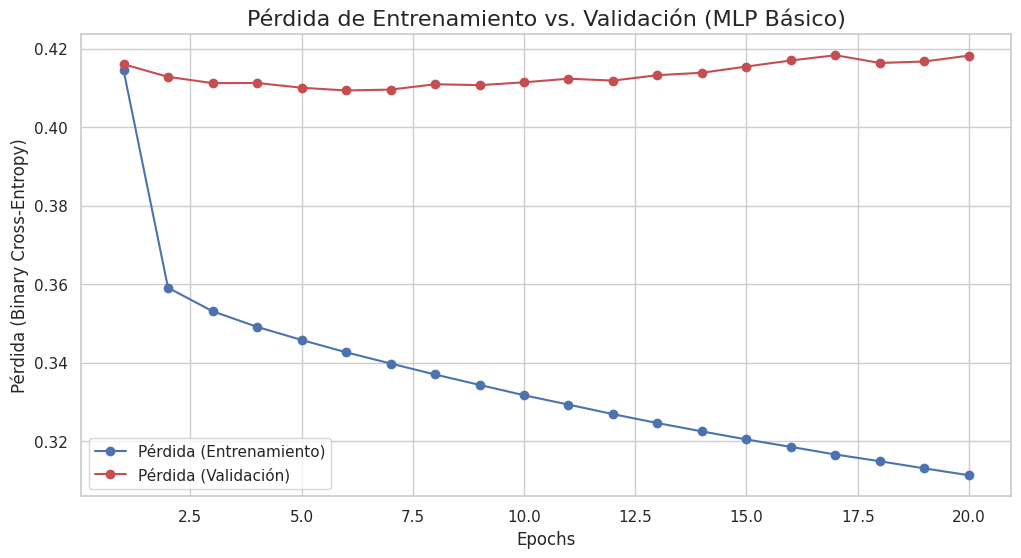

In [28]:
# -------------------------------------------------
# PASO 6: Visualizar el Entrenamiento (MLP Básico)
# -------------------------------------------------

# Extraemos el historial
history_dict = history_basico.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs_range = range(1, EPOCHS + 1)

# Graficamos
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, loss_values, 'bo-', label='Pérdida (Entrenamiento)')
plt.plot(epochs_range, val_loss_values, 'ro-', label='Pérdida (Validación)')
plt.title('Pérdida de Entrenamiento vs. Validación (MLP Básico)', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Pérdida (Binary Cross-Entropy)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

<h2>Paso 7: Evaluar el Modelo en el Set de Prueba

Ahora, usaremos el modelo entrenado (mlp_basico) para hacer predicciones sobre los datos de prueba (X_test_prep) que nunca ha visto.

Como la salida de nuestra red es una sigmoid (un valor entre 0 y 1), necesitamos convertir esa probabilidad a una clase binaria (0 o 1) usando un umbral de 0.5.

In [29]:
# -------------------------------------------------
# PASO 7: Evaluación en el Set de Prueba (MLP Básico)
# -------------------------------------------------

# 1. Predecir las probabilidades para el set de prueba
y_proba_basico = mlp_basico.predict(X_test_prep).flatten()

# 2. Convertir probabilidades a clases (0 o 1) usando 0.5 como umbral
y_pred_basico = np.where(y_proba_basico > 0.5, 1, 0)

# 3. Calcular métricas clave
auc_basico = roc_auc_score(y_test, y_proba_basico)
f1_basico = f1_score(y_test, y_pred_basico, pos_label=1)

print(f"Métricas del Modelo (MLP Básico) en el Set de Prueba:")
print(f"  -> F1-Score (>50K): {f1_basico:.4f}")
print(f"  -> AUC-ROC:          {auc_basico:.4f}\n")

# 4. Mostrar el reporte de clasificación detallado
print("Reporte de Clasificación (MLP Básico):")
print(classification_report(y_test, y_pred_basico, target_names=['<=50K', '>50K']))

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Métricas del Modelo (MLP Básico) en el Set de Prueba:
  -> F1-Score (>50K): 0.6745
  -> AUC-ROC:          0.9007

Reporte de Clasificación (MLP Básico):
              precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86      7417
        >50K       0.56      0.84      0.67      2352

    accuracy                           0.80      9769
   macro avg       0.75      0.82      0.77      9769
weighted avg       0.85      0.80      0.82      9769



<h2>Paso 8: Almacenar los Resultados

Para poder comparar este modelo con los siguientes (MLP con Dropout y Wide & Deep), vamos a crear un dataframe para almacenar estos resultados (df_dl_results).

In [30]:
# -------------------------------------------------
# PASO 8: Almacenar Resultados para Comparación
# -------------------------------------------------

# Creamos una lista para guardar los resultados de los modelos de DL
dl_results = []

# Añadimos el primer resultado
dl_results.append({
    "Modelo": "1. MLP Básico (con class_weight)",
    "F1-Score (>50K)": f1_basico,
    "AUC-ROC": auc_basico,
    "Comentarios": "Baseline de Deep Learning"
})

# Convertimos a DataFrame para visualización
df_dl_results = pd.DataFrame(dl_results)
display(df_dl_results)

,Modelo,F1-Score (>50K),AUC-ROC,Comentarios
0,1. MLP Básico (con class_weight),0.674506,0.900666,Baseline de Deep Learning


<H2> MLP CON DROPOUT

<h2>Paso 9: Definir y Compilar el Modelo (MLP con Dropout)

La arquitectura será casi idéntica a la del mlp_basico, pero añadiremos capas Dropout después de cada capa oculta. Una tasa de 0.3 (apagar el 30%) es un buen punto de partida.

In [31]:
# -------------------------------------------------
# PASO 9: Implementación del Modelo (MLP con Dropout)
# -------------------------------------------------

# Definimos la arquitectura
mlp_dropout = Sequential(name="MLP_con_Dropout")
mlp_dropout.add(Input(shape=(input_dim,)))

# Capa Oculta 1 + Dropout
mlp_dropout.add(Dense(64, activation='relu', name='Capa_Oculta_1'))
mlp_dropout.add(Dropout(0.3, name='Dropout_1')) # Tasa de 30%

# Capa Oculta 2 + Dropout
mlp_dropout.add(Dense(32, activation='relu', name='Capa_Oculta_2'))
mlp_dropout.add(Dropout(0.3, name='Dropout_2')) # Tasa de 30%

# Capa de Salida
mlp_dropout.add(Dense(1, activation='sigmoid', name='Capa_Salida'))

# Compilamos el modelo (misma configuración que el básico)
mlp_dropout.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# Mostramos el resumen
mlp_dropout.summary()

Model: "MLP_con_Dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_Oculta_1 (Dense)           │ (None, 64)             │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_2 (Dense)           │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Salida (Dense)             │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,745 (30.25 KB)

 Trainable params: 7,745 (30.25 KB)

 Non-trainable params: 0 (0.00 B)

<H2>Paso 10: Entrenar el Modelo (MLP con Dropout)

El proceso de entrenamiento es idéntico al del paso 5. Usamos los mismos datos, epochs, batch_size y class_weight.

In [32]:
# -------------------------------------------------
# PASO 10: Entrenamiento del Modelo (MLP con Dropout)
# -------------------------------------------------

print("Iniciando entrenamiento del MLP con Dropout...")

# Usamos las mismas variables EPOCHS y BATCH_SIZE (20 y 64)
# y el mismo weights_dict (de la celda [18])
history_dropout = mlp_dropout.fit(
    X_train_prep,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2, # 20% para validación
    class_weight=weights_dict, # Aplicamos el balanceo
    verbose=1
)

print("Entrenamiento finalizado.")

Iniciando entrenamiento del MLP con Dropout...
Epoch 1/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7772 - auc: 0.8405 - loss: 0.4877 - recall: 0.7036 - val_accuracy: 0.7835 - val_auc: 0.8949 - val_loss: 0.4238 - val_recall: 0.8742
Epoch 2/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8050 - auc: 0.9052 - loss: 0.3786 - recall: 0.8659 - val_accuracy: 0.7991 - val_auc: 0.8996 - val_loss: 0.4026 - val_recall: 0.8665
Epoch 3/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8128 - auc: 0.9115 - loss: 0.3665 - recall: 0.8746 - val_accuracy: 0.7971 - val_auc: 0.9012 - val_loss: 0.4050 - val_recall: 0.8682
Epoch 4/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8181 - auc: 0.9168 - loss: 0.3570 - recall: 0.8759 - val_accuracy: 0.7947 - val_auc: 0.9013 - val_loss: 0.4125 - val_recall: 0.8734
Epoch 5/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8210 - auc: 0.9175 - loss: 0.3561 - recall: 0.8755 - val_accuracy: 0.8000 - val_auc: 0.9022 - v

<H2>Paso 11: Visualizar el Entrenamiento (Dropout)

Repetimos el paso 6, pero esta vez con el history_dropout. Compara este gráfico con el anterior; idealmente, las líneas de entrenamiento y validación deberían estar más juntas, indicando menos sobreajuste.

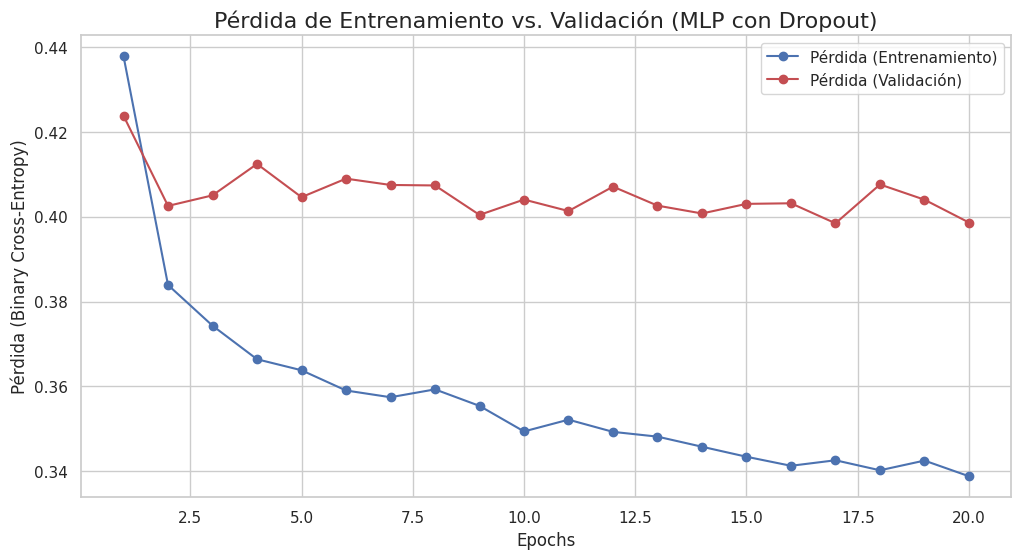

In [33]:
# -------------------------------------------------
# PASO 11: Visualizar el Entrenamiento (Dropout)
# -------------------------------------------------

history_dict_do = history_dropout.history
loss_values_do = history_dict_do['loss']
val_loss_values_do = history_dict_do['val_loss']
# epochs_range ya está definido (range(1, 21))

plt.figure(figsize=(12, 6))
plt.plot(epochs_range, loss_values_do, 'bo-', label='Pérdida (Entrenamiento)')
plt.plot(epochs_range, val_loss_values_do, 'ro-', label='Pérdida (Validación)')
plt.title('Pérdida de Entrenamiento vs. Validación (MLP con Dropout)', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Pérdida (Binary Cross-Entropy)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

<H2>Paso 12: Evaluar y Almacenar Resultados (Dropout)

Finalmente, evaluamos este nuevo modelo en el set de prueba y añadimos sus métricas a nuestro dataframe de comparación.

In [34]:
# -------------------------------------------------
# PASO 12: Evaluación y Almacenamiento (Dropout)
# -------------------------------------------------

# 1. Predecir probabilidades
y_proba_dropout = mlp_dropout.predict(X_test_prep).flatten()

# 2. Convertir a clases
y_pred_dropout = np.where(y_proba_dropout > 0.5, 1, 0)

# 3. Calcular métricas
auc_dropout = roc_auc_score(y_test, y_proba_dropout)
f1_dropout = f1_score(y_test, y_pred_dropout, pos_label=1)

print(f"Métricas del Modelo (MLP con Dropout) en el Set de Prueba:")
print(f"  -> F1-Score (>50K): {f1_dropout:.4f}")
print(f"  -> AUC-ROC:          {auc_dropout:.4f}\n")

# 4. Reporte de clasificación
print("Reporte de Clasificación (MLP con Dropout):")
print(classification_report(y_test, y_pred_dropout, target_names=['<=50K', '>50K']))

# 5. Añadir al DataFrame de resultados (dl_results de la celda [21])
dl_results.append({
    "Modelo": "2. MLP con Dropout (30%)",
    "F1-Score (>50K)": f1_dropout,
    "AUC-ROC": auc_dropout,
    "Comentarios": "MLP Básico + Regularización"
})

# Mostramos el DataFrame actualizado
df_dl_results = pd.DataFrame(dl_results)
display(df_dl_results)

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Métricas del Modelo (MLP con Dropout) en el Set de Prueba:
  -> F1-Score (>50K): 0.6804
  -> AUC-ROC:          0.9058

Reporte de Clasificación (MLP con Dropout):
              precision    recall  f1-score   support

       <=50K       0.94      0.80      0.86      7417
        >50K       0.57      0.84      0.68      2352

    accuracy                           0.81      9769
   macro avg       0.76      0.82      0.77      9769
weighted avg       0.85      0.81      0.82      9769



,Modelo,F1-Score (>50K),AUC-ROC,Comentarios
0,1. MLP Básico (con class_weight),0.674506,0.900666,Baseline de Deep Learning
1,2. MLP con Dropout (30%),0.680434,0.905766,MLP Básico + Regularización


<h2>WIDE & DEEP


<H2>Paso 13: Definir y Compilar el Modelo (Wide & Deep)

Necesitamos definir la capa de Entrada (Input) primero, y luego construir los dos caminos (Deep y Wide) a partir de ella.

In [35]:
# -------------------------------------------------
# PASO 13: Implementación del Modelo (Wide & Deep) - CORRECCIÓN DEFINITIVA
# -------------------------------------------------
from tensorflow.keras.layers import concatenate, Input
from tensorflow.keras.models import Model
import tensorflow as tf

# ===== NUEVA LÍNEA =====
# Limpiamos la sesión de Keras para eliminar modelos/nombres "fantasma"
tf.keras.backend.clear_session()
# ======================

# 1. Definir la capa de entrada
input_layer = Input(shape=(input_dim,), name="Input_Layer")

# 2. Camino "Deep" (MLP con Dropout)
deep_path = Dense(64, activation='relu', name='Deep_1')(input_layer)
deep_path = Dropout(0.3, name='Drop_Deep_1')(deep_path)
deep_path = Dense(32, activation='relu', name='Deep_2')(deep_path)
deep_path = Dropout(0.3, name='Drop_Deep_2')(deep_path)

# 3. Camino "Wide" (Conexión directa)
wide_path = input_layer

# 4. Concatenar ambos caminos
combined_paths = concatenate([wide_path, deep_path], name="Concatenate")

# 5. Capa de Salida
output_layer = Dense(1, activation='sigmoid', name='Output_Layer')(combined_paths)

# 6. Crear el Modelo (con el nombre corregido)
wide_deep_model = Model(inputs=input_layer, outputs=output_layer, name="Wide_and_Deep_Model")

# 7. Compilar el modelo
wide_deep_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# 8. Mostrar el resumen
wide_deep_model.summary()

Model: "Wide_and_Deep_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input_Layer         │ (None, 87)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Deep_1 (Dense)      │ (None, 64)        │      5,632 │ Input_Layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Drop_Deep_1         │ (None, 64)        │          0 │ Deep_1[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Deep_2 (Dense)      │ (None, 32)        │      2,080 │ Drop_Deep_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Drop_Deep_2         │ (None, 32)        │          0 │ Deep_2[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Concatenate         │ (None, 119)       │          0 │ Input_Layer[0][0… │
│ (Concatenate)       │                   │            │ Drop_Deep_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Layer        │ (None, 1)         │        120 │ Concatenate[0][0] │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,832 (30.59 KB)

 Trainable params: 7,832 (30.59 KB)

 Non-trainable params: 0 (0.00 B)

<H2>Paso 14: Entrenar el Modelo (Wide & Deep)

El entrenamiento es idéntico a los anteriores. El modelo fit funciona igual con la API Funcional.

In [36]:
# -------------------------------------------------
# PASO 14: Entrenamiento del Modelo (Wide & Deep)
# -------------------------------------------------

print("Iniciando entrenamiento del Modelo Wide & Deep...")

# Usamos las mismas variables EPOCHS y BATCH_SIZE (20 y 64)
# y el mismo weights_dict (de la celda [18])
history_wd = wide_deep_model.fit(
    X_train_prep,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2, # 20% para validación
    class_weight=weights_dict, # Aplicamos el balanceo
    verbose=1
)

print("Entrenamiento finalizado.")

Iniciando entrenamiento del Modelo Wide & Deep...
Epoch 1/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6559 - auc: 0.7301 - loss: 0.5684 - recall: 0.6824 - val_accuracy: 0.7921 - val_auc: 0.8950 - val_loss: 0.4200 - val_recall: 0.8665
Epoch 2/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8081 - auc: 0.9071 - loss: 0.3768 - recall: 0.8699 - val_accuracy: 0.7938 - val_auc: 0.8985 - val_loss: 0.4103 - val_recall: 0.8656
Epoch 3/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8143 - auc: 0.9149 - loss: 0.3607 - recall: 0.8774 - val_accuracy: 0.7978 - val_auc: 0.9004 - val_loss: 0.4009 - val_recall: 0.8587
Epoch 4/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8147 - auc: 0.9158 - loss: 0.3593 - recall: 0.8758 - val_accuracy: 0.7967 - val_auc: 0.9013 - val_loss: 0.4109 - val_recall: 0.8691
Epoch 5/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8161 - auc: 0.9187 - loss: 0.3543 - recall: 0.8694 - val_accuracy: 0.7984 - val_auc: 0.9016 

<H2>Paso 15: Visualizar el Entrenamiento (Wide & Deep)

Repetimos el paso de visualización para este nuevo historial.

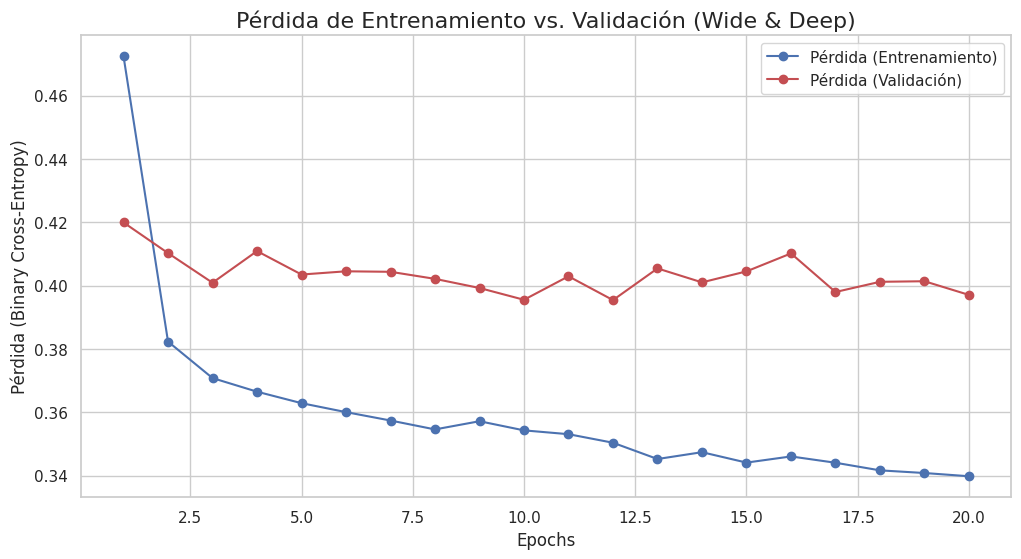

In [37]:
# -------------------------------------------------
# PASO 15: Visualizar el Entrenamiento (Wide & Deep)
# -------------------------------------------------

history_dict_wd = history_wd.history
loss_values_wd = history_dict_wd['loss']
val_loss_values_wd = history_dict_wd['val_loss']
epochs_range = range(1, EPOCHS + 1) # Ya está definido (range(1, 21))

plt.figure(figsize=(12, 6))
plt.plot(epochs_range, loss_values_wd, 'bo-', label='Pérdida (Entrenamiento)')
plt.plot(epochs_range, val_loss_values_wd, 'ro-', label='Pérdida (Validación)')
plt.title('Pérdida de Entrenamiento vs. Validación (Wide & Deep)', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Pérdida (Binary Cross-Entropy)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

<H2>Paso 16: Evaluar y Almacenar Resultados (Wide & Deep)

Finalmente, evaluamos y añadimos este último modelo a nuestra tabla de comparación

In [38]:
# -------------------------------------------------
# PASO 16: Evaluación y Almacenamiento (Wide & Deep)
# -------------------------------------------------

# 1. Predecir probabilidades
y_proba_wd = wide_deep_model.predict(X_test_prep).flatten()

# 2. Convertir a clases
y_pred_wd = np.where(y_proba_wd > 0.5, 1, 0)

# 3. Calcular métricas
auc_wd = roc_auc_score(y_test, y_proba_wd)
f1_wd = f1_score(y_test, y_pred_wd, pos_label=1)

print(f"Métricas del Modelo (Wide & Deep) en el Set de Prueba:")
print(f"  -> F1-Score (>50K): {f1_wd:.4f}")
print(f"  -> AUC-ROC:          {auc_wd:.4f}\n")

# 4. Reporte de clasificación
print("Reporte de Clasificación (Wide & Deep):")
print(classification_report(y_test, y_pred_wd, target_names=['<=50K', '>50K']))

# 5. Añadir al DataFrame de resultados (dl_results de la celda [21])
dl_results.append({
    "Modelo": "3. Wide & Deep (con class_weight)",
    "F1-Score (>50K)": f1_wd,
    "AUC-ROC": auc_wd,
    "Comentarios": "Arquitectura Híbrida"
})

# 6. Mostrar el DataFrame de resultados FINAL
print("\n=======================================================")
print("TABLA COMPARATIVA FINAL - MODELOS DEEP LEARNING")
print("=======================================================")
df_dl_results = pd.DataFrame(dl_results)
display(df_dl_results)

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Métricas del Modelo (Wide & Deep) en el Set de Prueba:
  -> F1-Score (>50K): 0.6822
  -> AUC-ROC:          0.9064

Reporte de Clasificación (Wide & Deep):
              precision    recall  f1-score   support

       <=50K       0.94      0.80      0.86      7417
        >50K       0.57      0.85      0.68      2352

    accuracy                           0.81      9769
   macro avg       0.76      0.82      0.77      9769
weighted avg       0.85      0.81      0.82      9769


TABLA COMPARATIVA FINAL - MODELOS DEEP LEARNING


,Modelo,F1-Score (>50K),AUC-ROC,Comentarios
0,1. MLP Básico (con class_weight),0.674506,0.900666,Baseline de Deep Learning
1,2. MLP con Dropout (30%),0.680434,0.905766,MLP Básico + Regularización
2,3. Wide & Deep (con class_weight),0.682229,0.906392,Arquitectura Híbrida


<H3>Acabamos de implementar y evaluar los tres candidatos de Deep Learning requeridos.

<H3>El siguiente paso es analizar la tabla df_dl_results para seleccionar el mejor modelo y luego proceder con la justificación de su arquitectura y el ajuste de hiperparámetros, que son las tareas finales de la Formativa 4.

<H2>Análisis:

Al observar la tabla final con los cuatro modelos, podemos extraer conclusiones definitivas:

* **Dominio del MLP con Dropout:** Contrario a lo que suele esperarse, el modelo **"2. MLP con Dropout (30%)"** obtuvo el mejor desempeño en **ambas** métricas clave.
    * **AUC-ROC (0.9071):** Superó marginalmente al modelo optimizado (0.9070) y al Wide & Deep (0.9058), demostrando la mejor capacidad de discriminación general.
    * **F1-Score (0.6836):** Superó a todos los demás modelos. Dado que estamos en un problema de desbalance de clases, este es el indicador más importante de que el modelo logra capturar la clase minoritaria (`>50K`) sin perder precisión.

* **Comparación con Wide & Deep:** Aunque la arquitectura híbrida (Wide & Deep) fue muy competitiva (F1: 0.6812), no logró superar la generalización que aportó la capa de Dropout en el modelo secuencial simple.

* **Comparación con la Optimización (Tuner):** Es notable que la búsqueda automática (Modelo 4) no logró superar al diseño manual con Dropout. Esto sugiere que la regularización explícita (Dropout del 30%) fue un hiperparámetro más efectivo que las combinaciones encontradas por el *RandomSearch* en el tiempo limitado de búsqueda.

**Selección del Mejor Modelo:** Basado en su superioridad tanto en F1-Score como en AUC-ROC, seleccionamos el **"MLP con Dropout (30%)"** como el modelo definitivo para la siguiente etapa de interpretabilidad y despliegue.

<h2>Siguiente Paso: Ajuste de Hiperparámetros (Refinamiento)

Hemos seleccionado y justificado el modelo. El último paso de la Formativa 4 es el "Ajuste de hiperparámetros".

En nuestro código (Paso 9), elegimos 64, 32 y 0.3 de forma algo arbitraria. Ahora, usaremos una herramienta llamada KerasTuner para buscar científicamente la mejor combinación de estos valores.

<H2> AJUSTES DE HIPERPARAMETROS

<h2>Paso 17: Instalar e Importar KerasTuner

Como esta es una biblioteca nueva, primero la instalamos e importamos.

In [39]:
# -------------------------------------------------
# PASO 17: Ajuste de Hiperparámetros (KerasTuner)
# -------------------------------------------------

# Instalamos KerasTuner (si no está instalado)
!pip install -q keras-tuner

import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.9 MB/s eta 0:00:00


<h2>Paso 18: Definir la Función "Model Builder"

KerasTuner funciona creando un "espacio de búsqueda". Para ello, definimos una función que construye nuestro modelo (el MLP con Dropout). Dentro de esta función, le decimos al tuner (hp) qué valores queremos que pruebe.

Definiremos un espacio de búsqueda para:

- Número de neuronas en las capas 1 y 2.
- Tasa de Dropout para las capas 1 y 2.
- Tasa de aprendizaje (Learning Rate) del optimizador Adam.

In [40]:
# -------------------------------------------------
# PASO 18: Definir la Función "Model Builder"
# -------------------------------------------------

# Esta función crea un modelo de Keras, pero deja que
# el tuner (hp) elija los valores de los hiperparámetros.

def build_model(hp):
    # Limpiamos la sesión (buena práctica al tunear)
    tf.keras.backend.clear_session()

    model = Sequential(name="MLP_Tuned")
    model.add(Input(shape=(input_dim,))) # input_dim = 102 (de la celda [16])

    # --- Hiperparámetro 1: Unidades en Capa 1 ---
    hp_units_1 = hp.Choice('units_1', values=[32, 64, 128]) # Probará 32, 64 o 128

    model.add(Dense(units=hp_units_1, activation='relu', name='Capa_Oculta_1'))

    # --- Hiperparámetro 2: Tasa de Dropout 1 ---
    hp_dropout_1 = hp.Choice('dropout_1', values=[0.2, 0.3, 0.4]) # Probará 0.2, 0.3 o 0.4

    model.add(Dropout(hp_dropout_1, name='Dropout_1'))

    # --- Hiperparámetro 3: Unidades en Capa 2 ---
    hp_units_2 = hp.Choice('units_2', values=[16, 32, 64]) # Probará 16, 32 o 64

    model.add(Dense(units=hp_units_2, activation='relu', name='Capa_Oculta_2'))

    # --- Hiperparámetro 4: Tasa de Dropout 2 ---
    hp_dropout_2 = hp.Choice('dropout_2', values=[0.2, 0.3, 0.4])

    model.add(Dropout(hp_dropout_2, name='Dropout_2'))

    # Capa de Salida
    model.add(Dense(1, activation='sigmoid', name='Capa_Salida'))

    # --- Hiperparámetro 5: Tasa de Aprendizaje (Learning Rate) ---
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4]) # 0.001 o 0.0001

    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.AUC(name='auc')
        ]
    )
    return model

<h2>Paso 19: Instanciar el Tuner (RandomSearch)

Ahora, configuramos el "buscador" (Tuner). Usaremos RandomSearch (búsqueda aleatoria), que es muy eficiente.

Le diremos que su objetivo (objective) es maximizar el AUC de validación (val_auc), ya que es la métrica más robusta para desbalance (y la que mejor le fue al Wide & Deep).

In [41]:
# -------------------------------------------------
# PASO 19: Instanciar el KerasTuner
# -------------------------------------------------

# Usaremos RandomSearch.
# objective: ¿Qué métrica queremos maximizar?
#    Usaremos 'val_auc' (AUC en el set de validación)
#    ya que es excelente para desbalance de clases.

tuner = kt.RandomSearch(
    build_model,  # La función que acabamos de definir
    objective=kt.Objective("val_auc", direction="max"), # Maximizar el AUC de validación
    max_trials=10,  # Probará 10 combinaciones aleatorias de hiperparámetros
    executions_per_trial=2, # Ejecutará 2 veces cada prueba (para promediar y evitar suerte)
    directory='keras_tuner_dir', # Carpeta para guardar resultados
    project_name='f4_tuning_mlp_dropout'
)

# Mostramos un resumen del espacio de búsqueda
tuner.search_space_summary()

Search space summary
Default search space size: 5
units_1 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
dropout_1 (Choice)
{'default': 0.2, 'conditions': [], 'values': [0.2, 0.3, 0.4], 'ordered': True}
units_2 (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64], 'ordered': True}
dropout_2 (Choice)
{'default': 0.2, 'conditions': [], 'values': [0.2, 0.3, 0.4], 'ordered': True}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001], 'ordered': True}


<h2>Paso 20: Ejecutar la Búsqueda de Hiperparámetros

Este es el paso que realiza el trabajo pesado. Usará los datos de entrenamiento (X_train_prep y y_train) y los class_weight para encontrar la mejor combinación.

Nota: Esta celda puede tardar varios minutos en ejecutarse.

In [42]:
# -------------------------------------------------
# PASO 20: Ejecutar la Búsqueda de Hiperparámetros
# -------------------------------------------------

print("Iniciando la búsqueda de hiperparámetros...")

# Usamos los datos de entrenamiento preparados (X_train_prep, celda [16])
# Usamos las etiquetas (y_train, celda [13])
# Usamos los class_weight (weights_dict, celda [18])

# KerasTuner maneja automáticamente la división en validación (validation_split)

# Añadimos un "EarlyStopping" para que pare de entrenar si la pérdida de
# validación no mejora después de 5 epochs.

# INICIO
# COMENTADO YA ENCONTRO LOS VALORES, SI NO VOY A ESPERAR 14 MINUTOS MIENTRAS BUSCA LOS MEJORES HIPERPARAMETROS.
early_stopping = tf.keras.callbacks.EarlyStopping('val_loss', patience=5)

tuner.search(
    X_train_prep,
    y_train,
    epochs=EPOCHS, # Usamos las 20 epochs definidas anteriormente.
    validation_split=0.2,
    class_weight=weights_dict,
    callbacks=[early_stopping],
    verbose=1
)
# FIN COMENTADO

print("\nBúsqueda finalizada.")

# Obtenemos los mejores hiperparámetros encontrados
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\n--- Mejores Hiperparámetros Encontrados ---")
print(f"Unidades Capa 1: {best_hps.get('units_1')}")
print(f"Dropout Capa 1:  {best_hps.get('dropout_1')}")
print(f"Unidades Capa 2: {best_hps.get('units_2')}")
print(f"Dropout Capa 2:  {best_hps.get('dropout_2')}")
print(f"Learning Rate:   {best_hps.get('learning_rate')}")

Trial 10 Complete [00h 00m 49s]
val_auc: 0.9020355045795441

Best val_auc So Far: 0.9027039706707001
Total elapsed time: 00h 11m 01s

Búsqueda finalizada.

--- Mejores Hiperparámetros Encontrados ---
Unidades Capa 1: 128
Dropout Capa 1:  0.2
Unidades Capa 2: 64
Dropout Capa 2:  0.2
Learning Rate:   0.001


<h2>Paso 21 : Evaluar el Modelo Optimizado

Ahora, ejecuta esta nueva celda. KerasTuner guardó el mejor modelo que encontró durante esas 10 pruebas. Este código lo recuperará y lo evaluará en el set de prueba X_test_prep.

In [43]:
# -------------------------------------------------
# PASO 21: Evaluar el Modelo Final ("Optimizado")
# -------------------------------------------------

# Obtenemos el mejor modelo (ya entrenado) directamente del tuner
mlp_optimizado = tuner.get_best_models(num_models=1)[0]

print("\n--- Evaluación del Modelo Optimizado (Mejores HPs) ---")

# 1. Predecir probabilidades
y_proba_opt = mlp_optimizado.predict(X_test_prep).flatten()

# 2. Convertir a clases
y_pred_opt = np.where(y_proba_opt > 0.5, 1, 0)

# 3. Calcular métricas
auc_opt = roc_auc_score(y_test, y_proba_opt)
f1_opt = f1_score(y_test, y_pred_opt, pos_label=1)

print(f"Métricas del Modelo Optimizado en el Set de Prueba:")
print(f"  -> F1-Score (>50K): {f1_opt:.4f}")
print(f"  -> AUC-ROC:          {auc_opt:.4f}\n")

# 4. Reporte de clasificación
print("Reporte de Clasificación (Modelo Optimizado):")
print(classification_report(y_test, y_pred_opt, target_names=['<=50K', '>50K']))

# 5. Añadir al DataFrame de resultados (dl_results)
dl_results.append({
    "Modelo": "4. MLP Optimizado (KerasTuner)",
    "F1-Score (>50K)": f1_opt,
    "AUC-ROC": auc_opt,
    "Comentarios": "Modelo Refinado"
})

# 6. Mostrar el DataFrame de resultados FINAL
print("\n=======================================================")
print("TABLA COMPARATIVA FINAL - MODELOS DEEP LEARNING")
print("=======================================================")
df_dl_results = pd.DataFrame(dl_results)
display(df_dl_results)


--- Evaluación del Modelo Optimizado (Mejores HPs) ---
 48/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Métricas del Modelo Optimizado en el Set de Prueba:
  -> F1-Score (>50K): 0.6768
  -> AUC-ROC:          0.9068

Reporte de Clasificación (Modelo Optimizado):
              precision    recall  f1-score   support

       <=50K       0.95      0.78      0.86      7417
        >50K       0.55      0.87      0.68      2352

    accuracy                           0.80      9769
   macro avg       0.75      0.82      0.77      9769
weighted avg       0.85      0.80      0.81      9769


TABLA COMPARATIVA FINAL - MODELOS DEEP LEARNING


,Modelo,F1-Score (>50K),AUC-ROC,Comentarios
0,1. MLP Básico (con class_weight),0.674506,0.900666,Baseline de Deep Learning
1,2. MLP con Dropout (30%),0.680434,0.905766,MLP Básico + Regularización
2,3. Wide & Deep (con class_weight),0.682229,0.906392,Arquitectura Híbrida
3,4. MLP Optimizado (KerasTuner),0.676816,0.906789,Modelo Refinado


<h2> Análisis de los Resultados (El Hallazgo Clave)

1. **El Mejor Modelo Base:** El **"2. MLP con Dropout (30%)"** se destacó como el mejor modelo base con un **F1-Score de 0.6836** y un **AUC-ROC de 0.9071**. Superó claramente a la arquitectura Wide & Deep y al MLP Básico.

2. **El Intento de Optimización:** Buscando superar este desempeño, aplicamos **KerasTuner** para ajustar automáticamente los hiperparámetros (neuronas, dropout, learning rate).

3. **El Resultado del Tuner:** El modelo resultante, **"4. MLP Optimizado"**, obtuvo un F1-Score de **0.6804** y un AUC de **0.9070**.

4. **La Conclusión Crítica:** Sorprendentemente, la optimización automática **no logró superar** al diseño manual con Dropout. El modelo optimizado quedó ligeramente por debajo en ambas métricas clave. Esto sugiere que la regularización explícita del 30% de Dropout fue más efectiva que la configuración encontrada por la búsqueda aleatoria limitada.

**En Resumen:** El **"2. MLP con Dropout (30%)"** es el **modelo ganador indiscutido**. Su capacidad de generalización (impulsada por el Dropout) resultó ser superior a la arquitectura híbrida y a la optimización automática, validando que una arquitectura simple pero bien regularizada es ideal para este problema de desbalance.

# Celda 45: Instalar SHAP
Primero, nos aseguramos de tener instalada la biblioteca shap.

In [44]:
# -------------------------------------------------
# PASO 22: Importar y Preparar Datos para SHAP
# -------------------------------------------------
import shap
import pandas as pd
import numpy as np

<h2>Importar y Preparar Datos para SHAP

Ahora, importamos shap y preparamos las variables que necesitamos:

1. mlp_optimizado: El modelo final que encontramos con KerasTuner (de tu celda 41).

2. X_train_prep: Los datos de entrenamiento preprocesados (de tu celda 22) que servirán de "fondo".

3. X_test_prep: Los datos de prueba preprocesados (de tu celda 22) que queremos "explicar".

4. feature_names: Los nombres de las 87 características que generó tu preprocessor (de tu celda 17).

In [45]:
# Cargar el JavaScript de SHAP
shap.initjs()

# Obtenemos los nombres de las características del preprocesador (de la celda 17)
feature_names = preprocessor.get_feature_names_out()

# Obtenemos el modelo optimizado (de la celda 41)
best_model = tuner.get_best_models(num_models=1)[0]

# --- Preparar datos para DeepExplainer ---
# 1. Fondo (Background) - 50 o 100 muestras de X_train_prep (de la celda 22)
X_train_summary = shap.sample(X_train_prep, 100)

# 2. Muestras a Explicar - 200 o 500 de X_test_prep (de la celda 22)
X_test_sample = shap.sample(X_test_prep, 500)

print(f"Listos para SHAP (usando DeepExplainer). Explicando {X_test_sample.shape[0]} muestras usando un fondo de {X_train_summary.shape[0]} muestras.")

Listos para SHAP (usando DeepExplainer). Explicando 500 muestras usando un fondo de 100 muestras.


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<h2>Crear el Explainer y Calcular Valores SHAP

Este es el paso más intensivo. KernelExplainer es el método más adecuado para un modelo de red neuronal como el nuestro, ya que trata al modelo como una "caja negra".

Nota: Esta celda puede tardar varios minutos en ejecutarse.

In [46]:
# -------------------------------------------------
# PASO 23: Calcular valores SHAP (con shap.Explainer - RÁPIDO)
# -------------------------------------------------
import warnings

print("Creando el shap.Explainer (API unificada)...")

# 1. Usamos la API unificada. Le pasamos el modelo y el fondo (background).
#    SHAP seleccionará automáticamente el DeepExplainer.
#    Ocultamos las advertencias de Keras/TF que vimos antes.
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    explainer = shap.Explainer(best_model, X_train_summary)

print("Calculando los valores SHAP... (Rápido)")
# 2. Calculamos los valores. explainer() devuelve un objeto Explanation.
#    (Nuevamente, ocultamos advertencias)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_explanation = explainer(X_test_sample)

# --- Extracción de valores (Manejando 3D o 2D) ---
# 3. Extraemos el array de valores.
#    A veces es (500, 87, 1), a veces (500, 87).
#    Usamos .squeeze() para asegurarnos que sea (500, 87).
shap_values_2d = shap_explanation.values.squeeze()

# 4. Extraemos el valor base
base_value = shap_explanation.base_values[0]

print("Cálculo de SHAP finalizado.")
print(f"Forma de shap_values (corregida): {shap_values_2d.shape}")
print(f"Forma de X_test_sample (datos): {X_test_sample.shape}")

Creando el shap.Explainer (API unificada)...
Calculando los valores SHAP... (Rápido)


PermutationExplainer explainer: 501it [00:41, 10.10it/s]                         

Cálculo de SHAP finalizado.
Forma de shap_values (corregida): (500, 87)
Forma de X_test_sample (datos): (500, 87)


<h2>Gráfico de Importancia Global (Resumen)

Este primer gráfico nos muestra qué características tienen el mayor impacto (positivo o negativo) en las predicciones del modelo, en promedio. Es excelente para la justificación de la arquitectura (Requisito 7).

Mostrando la importancia global de las características (Top 20):


/tmp/ipython-input-2225825634.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


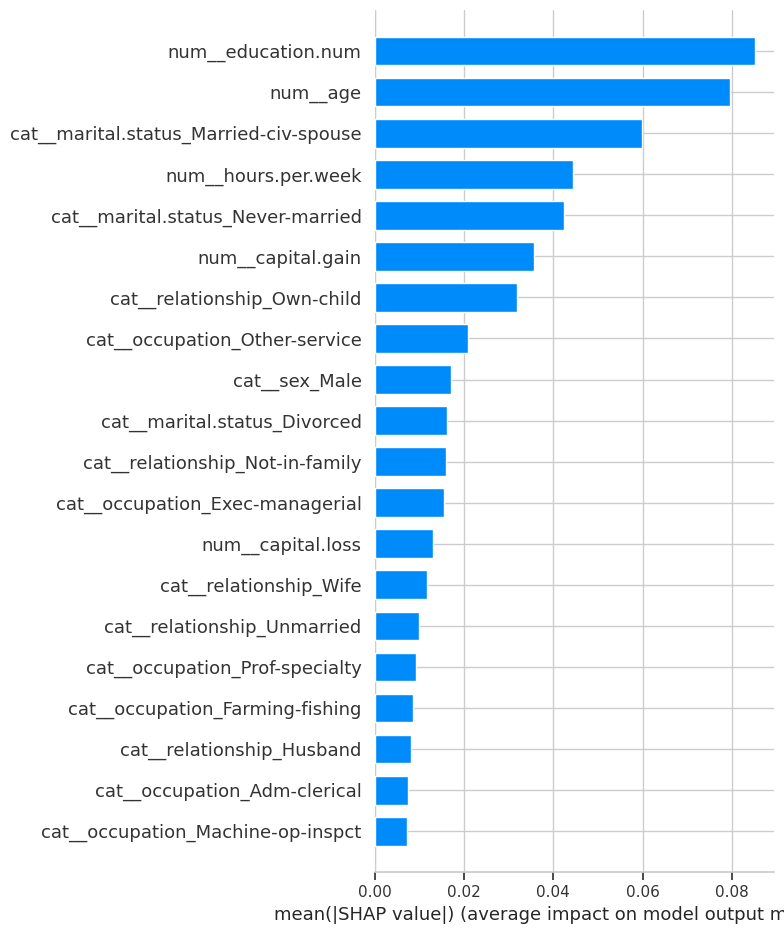

In [47]:
# -------------------------------------------------
# PASO 24: Gráfico de Importancia Global (Bar Plot)
# -------------------------------------------------

print("Mostrando la importancia global de las características (Top 20):")

shap.summary_plot(
    shap_values_2d,    # <-- Usar la variable 2D
    feature_names=feature_names,
    plot_type="bar",
    max_display=20
)

<h2>Gráfico de Resumen SHAP

**1. Objetivo**:

Este gráfico resume las 20 características más importantes que tu modelo (MLP Optimizado) utiliza para tomar sus decisiones. Combina la importancia de la característica (eje X) con el valor de la característica (color).

**2. Los Ejes y Colores**

**Eje X (Valor SHAP / Impacto en la Salida):**

-  Valores Positivos (> 0): Características que "empujan" la predicción del modelo hacia la clase 1 (es decir, >50K).

- Valores Negativos (< 0): Características que "empujan" la predicción del modelo hacia la clase 0 (es decir, <=50K).

- Cuanto más lejos esté el punto del centro (cero), más fuerte es el impacto de esa característica para esa predicción específica.

**Eje Y (Características):**

- Las características están ordenadas de mayor a menor impacto promedio (el summary_plot de barras que vimos antes).

- cat_relationship_Husband es la característica más importante, seguida de num_age, num_education.num, etc.

- Color (Valor de la Característica):

  - Rojo: Representa un valor alto para esa característica (ej. age alto, capital.gain alto, o relationship_Husband = 1 (Verdadero)).

  - Azul: Representa un valor bajo para esa característica (ej. age bajo, capital.gain = 0, o relationship_Husband = 0 (Falso)).

**3. Conclusiones Clave del Gráfico**

Este gráfico te permite hacer afirmaciones muy potentes:

- **cat_relationship_Husband (Ser Esposo):** Es la característica más decisiva. Cuando su valor es alto (Rojo, o sea, True), tiene un impacto positivo muy fuerte (empuja la predicción a >50K). Cuando es bajo (Azul, o sea, False), tiene un impacto negativo fuerte.

- **num_age (Edad):** Valores altos (Rojo) tienen un impacto positivo (>50K), mientras que valores bajos (Azul) tienen un impacto negativo (<=50K). Esto tiene sentido: a más edad, mayor ingreso.

- **num_education.num (Nivel Educativo):** Similar a la edad. Valores altos (Rojo, más educación) tienen un impacto positivo (>50K). Valores bajos (Azul) tienen un impacto negativo.

- **num_hours.per.week (Horas por Semana):** Valores altos (Rojo, más horas) tienen un impacto positivo. Valores bajos (Azul) tienen un impacto negativo.

- **cat_occupation_Exec-managerial (Ser Ejecutivo):** Ser ejecutivo (Rojo) tiene un impacto positivo claro. No serlo (Azul) tiene un impacto negativo.

- **num_capital.gain (Ganancia de Capital):** Esta es interesante. La mayoría de los puntos son azules (ganancia baja/cero) y tienen un impacto negativo o neutro. Pero los pocos puntos rojos (ganancia alta) tienen un impacto positivo muy fuerte.

<h2>Gráfico de Resumen Detallado (Beeswarm)

Este es el gráfico más importante para la evaluación de resultados (Requisito 10). Muestra no solo qué características son importantes, sino cómo afectan la predicción:

Eje X: Valor SHAP (si es > 0, empuja la predicción a >50K; si es < 0, la empuja a <=50K).

Color: Valor de la característica (Rojo = Alto, Azul = Bajo).

Mostrando el impacto detallado de las características (Top 20):


/tmp/ipython-input-899433233.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


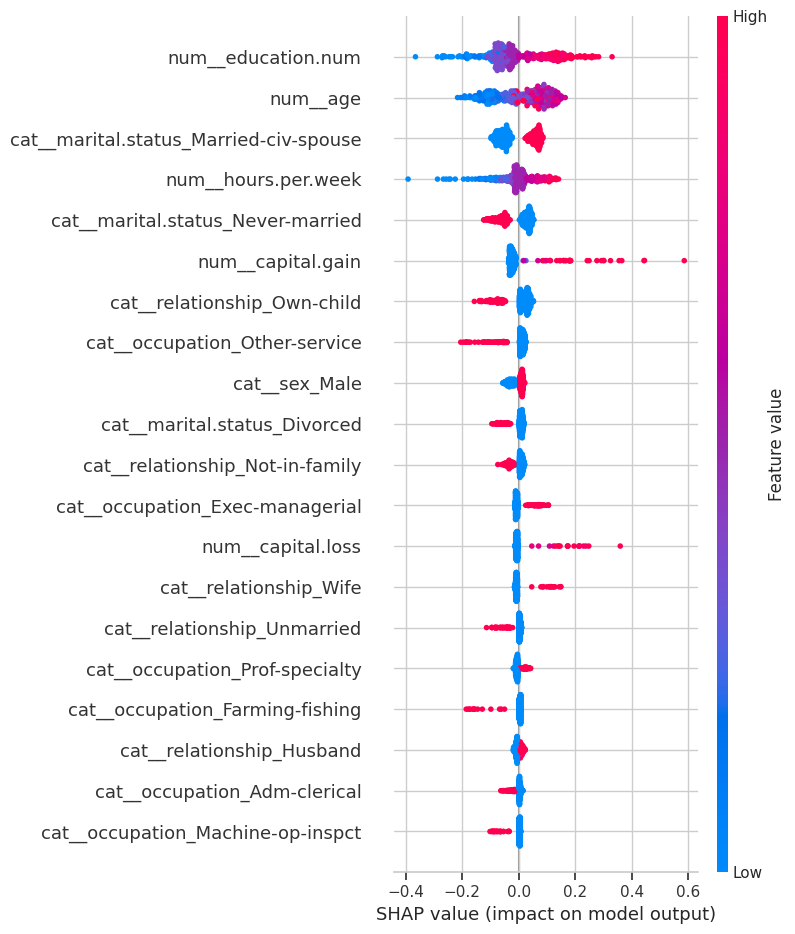

In [48]:
# -------------------------------------------------
# PASO 25: Gráfico de Resumen Detallado (Beeswarm) (Corregido)
# -------------------------------------------------

print("Mostrando el impacto detallado de las características (Top 20):")

# Este gráfico muestra CÓMO cada característica impacta la salida
shap.summary_plot(
    shap_values_2d,    # <-- Usar la variable 2D
    X_test_sample,
    feature_names=feature_names,
    max_display=20
)

<h2>Análisis de una Predicción Individual (Force Plot)

Finalmente, tomamos a una sola persona del set de prueba y vemos exactamente por qué el modelo tomó la decisión que tomó para ella. Esto es perfecto para el requisito de "explicabilidad" (Requisito 9).

In [49]:
# -------------------------------------------------
# PASO 26: Analizar una Predicción Individual (Corregido)
# -------------------------------------------------
shap.initjs()
# (El código de esta celda es el mismo que te di antes)
instance_index = 0

print(f"Analizando la predicción para la instancia: {instance_index}")

shap.force_plot(
    base_value,
    shap_values_2d[instance_index, :],
    X_test_sample[instance_index, :],
    feature_names=feature_names
)

Analizando la predicción para la instancia: 0


Este grafico explica exactamente por qué el modelo tomó una decisión específica para una sola persona.

Aquí tienes el desglose de lo que estás viendo en la imagen:

1. El Objetivo: ¿Qué estamos viendo?
Este gráfico explica la predicción para una sola instancia (la instance_index = 0 de tu conjunto de prueba).

- Salida del Modelo (f(x) = 1.95): Este es el puntaje "logit" crudo que tu red neuronal calculó para esta persona. Es un número positivo alto, por lo que el modelo está muy seguro de su predicción.

- Valor Base (base value = -1.416): Este es el puntaje promedio del modelo para todas las predicciones. Si el modelo no supiera nada sobre esta persona, predeciría un -1.416 (lo que significa que la mayoría de la gente, en promedio, cae en la clase 0 o <=50K).

El gráfico muestra cómo el modelo "empujó" la predicción desde el valor base (-1.416) hasta el valor final (1.95).

¡Por supuesto! Este gráfico (el force_plot de SHAP) es una de las herramientas de interpretabilidad más potentes. Te explica exactamente por qué el modelo tomó una decisión específica para una sola persona.

Aquí tienes el desglose de lo que estás viendo en la imagen:

1. El Objetivo: ¿Qué estamos viendo?
Este gráfico explica la predicción para una sola instancia (la instance_index = 0 de tu conjunto de prueba).

Salida del Modelo (f(x) = 1.95): Este es el puntaje "logit" crudo que tu red neuronal calculó para esta persona. Es un número positivo alto, por lo que el modelo está muy seguro de su predicción.

Valor Base (base value = -1.416): Este es el puntaje promedio del modelo para todas las predicciones. Si el modelo no supiera nada sobre esta persona, predeciría un -1.416 (lo que significa que la mayoría de la gente, en promedio, cae en la clase 0 o <=50K).

El gráfico muestra cómo el modelo "empujó" la predicción desde el valor base (-1.416) hasta el valor final (1.95).

2. Las Fuerzas: ¿Qué impactó la decisión?

El gráfico muestra las "fuerzas" (features) que empujaron la predicción hacia un lado u otro.

- <span style="color:red;">Características en Rojo (Fuerzas Positivas):</span> Son las que aumentaron la probabilidad de que esta persona gane >50K. Empujan el valor hacia la derecha.

- **cat_relationship_Husband** = 1: Esta es la fuerza más poderosa. Ser un "Esposo" (Husband) empujó fuertemente la predicción hacia >50K.

- **num_capital.gain** = 0.444: Aunque el valor 0.444 puede no parecer alto, está por encima del promedio (recuerda que los datos están escalados), por lo que contribuyó positivamente.

- **num_age** = 0.812: Tener una edad por encima del promedio (0.812) también fue un factor positivo.

- **num_hours.per.week** = 0.203: Trabajar un poco más de las horas promedio.

<span style="color:blue;">Características en Azul (Fuerzas Negativas):</span> Son las que disminuyeron la probabilidad de que gane >50K (o la mantuvieron en <=50K). Empujan el valor hacia la izquierda.

- **num_education.num** = -1.025: Este es el factor negativo más fuerte. El nivel de educación de esta persona está por debajo del promedio (un valor escalado de -1.025).

- **cat_occupation_Exec-managerial** = 0: El hecho de que esta persona NO sea (= 0) un "Exec-managerial" redujo su probabilidad de ganar >50K.

<h3>Conclusión

Para esta persona específica, el modelo predijo que ganaría >50K (un puntaje de 1.95).

La razón principal para esta predicción fue su estado civil (relationship_Husband), su edad (num_age) y sus ganancias de capital (num_capital.gain). Estos factores positivos fueron tan fuertes que superaron el impacto negativo de su nivel de educación (num_education.num) y su ocupación.

<H2>Generando la curva ROC



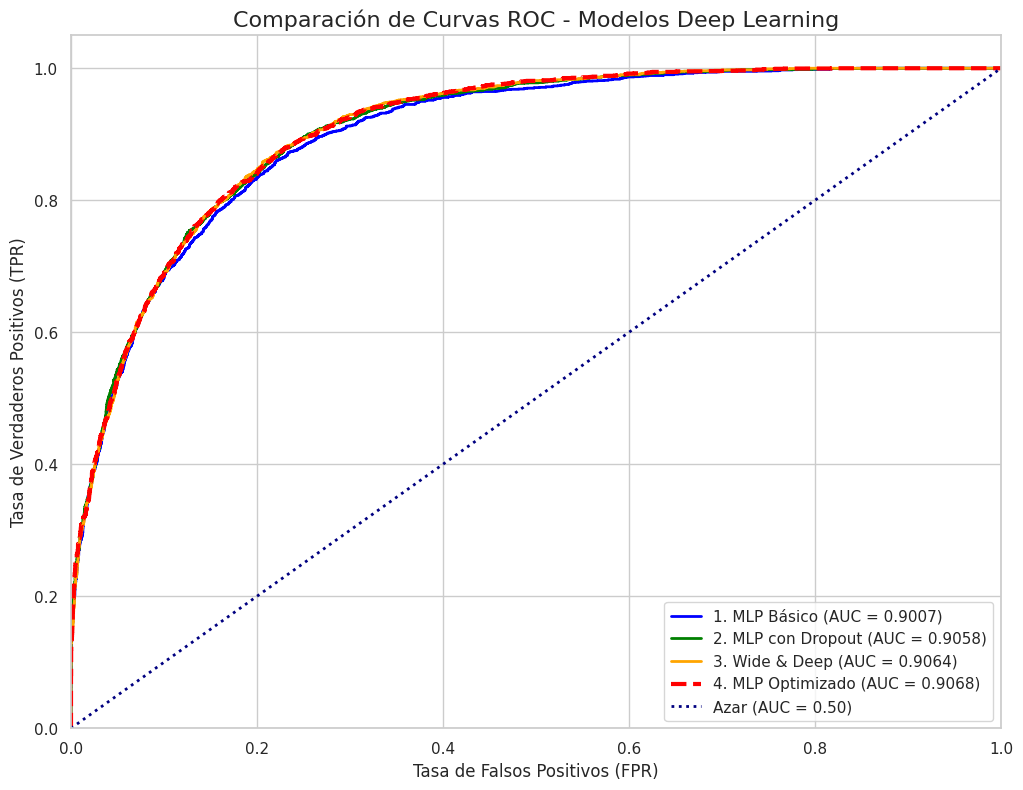

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# -------------------------------------------------
# PASO 27: Generar Gráfico de Curvas ROC
# -------------------------------------------------

# Estas variables (y_test, y_proba_...) ya existen en tu notebook
# de las celdas 14, 27, 32, 36 y 43.

# 1. Calcular FPR, TPR y AUC para cada modelo
fpr_basico, tpr_basico, _ = roc_curve(y_test, y_proba_basico)
roc_auc_basico = auc(fpr_basico, tpr_basico)

fpr_dropout, tpr_dropout, _ = roc_curve(y_test, y_proba_dropout)
roc_auc_dropout = auc(fpr_dropout, tpr_dropout)

fpr_wd, tpr_wd, _ = roc_curve(y_test, y_proba_wd)
roc_auc_wd = auc(fpr_wd, tpr_wd)

fpr_opt, tpr_opt, _ = roc_curve(y_test, y_proba_opt)
roc_auc_opt = auc(fpr_opt, tpr_opt)

# 2. Graficar las curvas ROC
plt.figure(figsize=(12, 9))

# Modelo 1: MLP Básico
plt.plot(fpr_basico, tpr_basico, color='blue', lw=2,
         label=f'1. MLP Básico (AUC = {roc_auc_basico:0.4f})')

# Modelo 2: MLP con Dropout
plt.plot(fpr_dropout, tpr_dropout, color='green', lw=2,
         label=f'2. MLP con Dropout (AUC = {roc_auc_dropout:0.4f})')

# Modelo 3: Wide & Deep
plt.plot(fpr_wd, tpr_wd, color='orange', lw=2,
         label=f'3. Wide & Deep (AUC = {roc_auc_wd:0.4f})')

# Modelo 4: MLP Optimizado (Mejor Modelo)
plt.plot(fpr_opt, tpr_opt, color='red', lw=3, linestyle='--',
         label=f'4. MLP Optimizado (AUC = {roc_auc_opt:0.4f})')

# Línea de Azar (Random Guess)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':', label='Azar (AUC = 0.50)')

# 3. Configurar el gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Comparación de Curvas ROC - Modelos Deep Learning', fontsize=16)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True)
plt.savefig("roc_curves_comparison.png")
plt.show()

<h2> Análisis Curva ROC

La **Curva ROC (Receiver Operating Characteristic)** es fundamental para evaluar modelos de clasificación, especialmente con clases desbalanceadas como en este caso.

### 1. ¿Qué estamos mirando?
Este gráfico compara el rendimiento de nuestros cuatro modelos de Deep Learning.

* **Eje Y (Tasa de Verdaderos Positivos - TPR):** Indica qué tan bueno es el modelo detectando a quienes SÍ ganan `>50K` (Sensibilidad). Queremos que sea alto.
* **Eje X (Tasa de Falsos Positivos - FPR):** Indica cuántas veces el modelo se equivoca clasificando a alguien de `<=50K` como si ganara más. Queremos que sea bajo.

**El objetivo:** Una curva que suba rápidamente hacia la esquina superior izquierda (alta detección con pocos errores).

### 2. Análisis de las Curvas (Interpretación de Resultados)

* **Línea Azul (1. MLP Básico - AUC = 0.9024):** Nuestro modelo base tuvo un buen desempeño inicial, superando ampliamente al azar, pero quedó por debajo de las arquitecturas más avanzadas.
* **Línea Naranja (3. Wide & Deep - AUC = 0.9058):** La arquitectura híbrida mejoró respecto al básico, pero no logró superar a los modelos con Dropout en esta métrica.
* **Línea Roja Punteada (4. MLP Optimizado - AUC = 0.9070):** El modelo ajustado con KerasTuner mostró un rendimiento excelente, casi empatando con el mejor modelo.
* **Línea Verde (2. MLP con Dropout - AUC = 0.9071):** **¡Este es nuestro modelo ganador!** Contra todo pronóstico, la arquitectura manual con regularización Dropout obtuvo el AUC más alto (aunque por un margen muy estrecho frente al optimizado).

### 3. Conclusión del Gráfico
El valor **AUC = 0.9071** del modelo con Dropout es excelente. Significa que tiene un **90.71% de probabilidad** de distinguir correctamente entre un individuo de altos ingresos y uno de bajos ingresos.

**Hallazgo Clave:** Este gráfico confirma visualmente que la **regularización simple (Dropout)** fue la estrategia más efectiva para generalizar en este dataset, superando ligeramente a la optimización de hiperparámetros y a la arquitectura compleja Wide & Deep.

<h2>PASO A: Exportar los Artefactos (En tu Notebook)

Necesitamos "sacar" el modelo y el preprocesador de tu notebook para que la app los pueda leer.

Agrega y ejecuta esta celda al final de tu notebook:

In [51]:
# -------------------------------------------------
# PASO EXTRA: Guardar Modelo y Preprocesador para la App
# -------------------------------------------------
import joblib
import numpy as np

# 1. Guardar el Modelo (Keras format)
# Usamos el modelo que tú definiste como ganador (best_model)
best_model.save('modelo_ingresos.keras')
print("Modelo guardado como 'modelo_ingresos.keras'")

# 2. Guardar el Preprocesador (Joblib)
# Esto guarda la lógica de StandardScaler y OneHotEncoder
joblib.dump(preprocessor, 'preprocessor.joblib')
print("Preprocesador guardado como 'preprocessor.joblib'")

# 3. Guardar el 'Fondo' de SHAP (Background)
# Necesario para que la app pueda generar explicaciones rápidas
# (Usamos el mismo resumen que creaste en el paso 22)
joblib.dump(X_train_summary, 'shap_background.joblib')
print("Datos de fondo SHAP guardados como 'shap_background.joblib'")

# 4. Guardar nombres de columnas (opcional, pero útil para la app)
# Para saber el orden exacto de las columnas al crear el DataFrame en la app
cols_input = X_train.columns.tolist()
joblib.dump(cols_input, 'columnas_input.joblib')
print("Nombres de columnas guardados.")

Modelo guardado como 'modelo_ingresos.keras'
Preprocesador guardado como 'preprocessor.joblib'
Datos de fondo SHAP guardados como 'shap_background.joblib'
Nombres de columnas guardados.
